# Introduction

## Backpropagation: A Deep Dive

In this notebook, we follow Andrej Karpathy's Neural Networks: Hero to Zero Lecture 5 on "Building makemore Part 4: Becoming a Backprop Ninja", we examine backpropagation in detail.

## What is a Leaky Abstraction?

### 1. What is an Abstraction?

First, you need to understand the concept of "abstraction." In computing and software design, abstraction refers to hiding complex details and showing only the essential features of an object or a system. Think of it like a car: when you drive, you don't need to know how its engine works in detail; you just need to know how to operate the steering wheel, accelerator, and brakes. The car's design abstracts away the complexities of its internal workings.

### 2. Perfect Abstraction

In a perfect world, abstractions would hide all the complexities underneath, and you'd never have to worry about them. Using the car example, it would be as if you never had to concern yourself with the engine, transmission, or any other internal part of the car; you'd just drive.

### 3. The Reality: Leaky Abstractions

However, no abstraction is perfect. At times, some of the complexities that an abstraction is supposed to hide "leak" through, forcing you to deal with them. This is the concept of a "leaky abstraction."

### 4. Examples:

#### a. **Computer Memory Management**:
High-level programming languages abstract away the details of memory management. In languages like Python, you don't have to manually allocate and deallocate memory like in C or C++. However, if you're not careful, you might still run into "memory leaks" where unused memory isn't freed up, leading to potential system slowdowns or crashes. The abstraction of automatic memory management is "leaking" in this case.

#### b. **Internet and Networks**:
When you visit a website, the complexities of data packets, IP addresses, and network routing are abstracted away from you. You just type a URL and see the webpage. But sometimes, the page fails to load because a "server IP address could not be found." The complexities of DNS (Domain Name System) and IP routing have "leaked" through the abstraction of the web browser.

#### c. **Driving a Car**:
Even with our car example, while you don't need to know how the engine works, sometimes you might have to deal with issues like the car not starting because the battery is dead. The abstraction of "just driving" leaks when you have to jump-start the car.

### 5. Why Does It Matter?

Understanding that abstractions can be leaky is crucial because it reminds developers, engineers, and users that no system is perfect. At times, you'll have to deal with the underlying complexities. It's a call to be prepared for unexpected challenges and to have a foundational understanding of the systems you're working with, even if they're abstracted away most of the time.

[The problem with Backpropagation is that it is a leaky abstraction](https://karpathy.medium.com/yes-you-should-understand-backprop-e2f06eab496b)


## Summary of transcript

---

### Importance of Understanding Backpropagation

The lecturer emphasizes the significance of understanding backpropagation, even in the age of auto-differentiation tools like PyTorch's autograd. Backpropagation is not just a magical tool that makes neural networks work; it requires a deep comprehension to ensure optimal functionality.

### Backpropagation as a "Leaky Abstraction"

The term "leaky abstraction" refers to the idea that without understanding its internals, backpropagation might not work optimally or could fail altogether. There are potential pitfalls:
- Saturating functions too much can cause gradients to vanish.
- Dead neurons in the network.
- Issues with exploding or vanishing gradients, especially with recurrent neural networks.
- Subtle bugs that arise from misunderstandings about backpropagation.

It's important to note that simply stacking differentiable functions and hoping backpropagation will handle everything isn't a guaranteed strategy for success.

### Historical Context: Manual Backpropagation

Historically, manually writing the backward pass (calculating gradients) was the norm. About a decade ago, it was standard practice to hand-write the backward pass rather than relying on auto-differentiation tools. The lecturer mentions:
- The use of MATLAB for deep learning, highlighting how the field's toolset has evolved.
- The manual calculation of gradients in earlier research work, emphasizing that understanding gradients and backpropagation was crucial.

This hands-on approach ensured that practitioners had a deep, intuitive understanding of how neural networks operated.

## Implementing Backward Pass Manually

The lecturer provides a walkthrough of implementing the backward pass manually, emphasizing its educational value:
- By implementing the backward pass, learners will get a more explicit understanding of the underlying processes, removing any hidden "magic".
- This understanding aids in debugging neural networks and ensuring that learners know exactly what is happening under the hood.

### Exercise Structure

The exercises in the lecture are structured to gradually introduce the concepts:
1. Full breakdown of the loss and manual backpropagation through each segment.
2. Collapsing the loss into a single cross-entropy call and deriving the gradient analytically.
3. Analytical gradient derivation for batch normalization.
4. Combining all the pieces to train a two-layer MLP without relying on `loss.backward()` from PyTorch.

### Pedagogical Approach

The lecturer recommends a hands-on approach to learning:
- Learners should first try to implement the derivatives or gradients themselves.
- Then, they can refer to the lecturer's video to compare and understand the solutions.

## Conclusion

Understanding the intricacies of backpropagation is crucial for anyone diving deep into neural networks. While modern tools simplify the process, having a foundational grasp ensures better problem-solving skills, debugging capabilities, and a deeper appreciation for the complexities of neural network training.

---

### Backpropagation in Neural Networks

The lecturer is diving deep into the concept of backpropagation in neural networks, specifically focusing on how to compute the gradients of different components of a network with respect to the loss. This is essential for training neural networks using optimization algorithms like gradient descent.

### Importance of Matching Shapes

When backpropagating, it's crucial to ensure that the shapes (dimensions) of tensors match up correctly, especially when broadcasting is involved. Broadcasting is a technique in PyTorch (and other deep learning frameworks) that allows tensors of different shapes to be combined in operations by implicitly expanding dimensions.

### Deriving Gradients for Softmax and Log Probabilities

- **Log Probabilities**: The gradient of the log probabilities, `d_log_probs`, is derived with respect to the loss. The shape of `log_probs` and `d_log_probs` will be the same.
  
- **Softmax Operation**: For numerical stability, it's common to subtract the maximum value from logits before exponentiating them in the softmax. This ensures that exponentiating doesn't result in extremely large values, which can cause numerical overflow.

### Element-wise Operations

Operations that are element-wise, like the log and exponentiation, have gradients that can be computed element-wise. For example, the gradient of the natural log is \( $\frac{1}{x} $\).

### Chain Rule

The chain rule is a fundamental concept in calculus used extensively in backpropagation. It allows the derivation of the gradient of composed functions. In the context of neural networks, it's used to compute the gradient of the loss with respect to any given parameter by multiplying the gradients of all operations that connect the loss to that parameter.

### Broadcasting and Replication

When dealing with tensors of mismatched dimensions, one tensor may need to be broadcasted (replicated) to match the shape of the other. It's essential to handle the backpropagation correctly in these cases. For example, when backpropagating through a multiplication where broadcasting occurred, the gradients might need to be summed across certain dimensions.

### Gradient Checking

The lecturer uses a method called `CMP` to compare the manually computed gradients with those computed automatically by PyTorch. This is a form of gradient checking, ensuring that the manual backpropagation is implemented correctly.

### Importance of Numerical Stability

For certain operations, especially those involving exponentials, it's essential to ensure numerical stability. This might involve subtracting the maximum value from a set of numbers before exponentiating them, which won't change the result due to the properties of exponentiation but will prevent potential numerical issues.

### Key Takeaways

1. **Backpropagation** is the process of computing the gradient of the loss with respect to every parameter in a neural network.
2. The **chain rule** is fundamental for backpropagation in neural networks.
3. Ensuring the correct tensor **shapes** and handling **broadcasting** is crucial.
4. **Numerical stability** is essential, especially for operations that can produce large values, like exponentiation.
5. **Gradient checking** by comparing manual gradients to those produced by a framework (like PyTorch) is a good practice to ensure the correctness of the backpropagation implementation.

---

### Understanding Backpropagation with Matrix Calculus

#### 1. Linear Layer Backpropagation
- The output of a linear layer, termed `logits`, is computed using matrix multiplication and an added bias.
- When examining the shapes of intermediate tensors, the bias vector undergoes broadcasting during addition to match the shape of the matrix multiplication result.
- To understand the backward pass, the approach recommended is to break down matrix operations to simpler scalar operations and then generalize them. This demystifies complex matrix derivatives into understandable scalar operations.
  
#### 2. Breaking Down Matrix Multiplication
- In breaking down matrix multiplication, each element of the resultant matrix is computed as a dot product of a row of the first matrix with a column of the second.
- To compute the gradient of the resultant matrix with respect to the elements of the original matrices, the chain rule is used. This involves computing local derivatives and using the incoming gradient.
- It was shown that the gradient with respect to one matrix is the dot product of the incoming gradient and the transpose of the other matrix.

#### 3. Understanding Broadcasting in Gradients
- Broadcasting refers to the operation of expanding dimensions of tensors to perform element-wise operations.
- When backpropagating, the broadcasting operation needs to be reversed. This often involves summing over the axis that was expanded.
- It's essential to ensure tensor shape consistency during backpropagation, especially when working with broadcasting.

#### 4. Backpropagation through Activation Functions
- For the `tanh` activation function, its derivative with respect to its input can be expressed in terms of its output: \($1 - \text{output}^2$\).
- This derivative is crucial for backpropagation as it scales the incoming gradient.
  
#### 5. Backpropagation through Batch Normalization
- Batch normalization involves standardizing the input data and then scaling and shifting it using learnable parameters.
- The backpropagation through the scaling and shifting is straightforward, but the backpropagation through the standardization involves more steps.
- It was highlighted that the variance computation in the forward pass used Bessel's correction (dividing by \(N-1\) instead of \(N\)). This affects the backward pass computations.
- The power rule of differentiation is used for backpropagating through the inverse square root in the standardization step.

#### Key Takeaways:
- Understanding the essence of matrix operations and broadcasting is vital for effective backpropagation in neural networks.
- By breaking complex operations into simpler scalar ones, the process of backpropagation becomes more intuitive.
- Ensuring tensor shape consistency is crucial, and often the shapes alone can guide the backpropagation steps.
- Activation functions and normalization layers introduce non-linearities, and understanding their derivatives is essential for backpropagation.

---

**Bessel's Correction in Batch Normalization**

The lecturer introduces a topic called Bessel's correction, which is used in the context of batch normalization in neural networks.

- **Variance Estimation**:
  - There are two ways to estimate the variance of an array:
    1. Biased estimate: \( $\frac{1}{n}$ \)
    2. Unbiased estimate: \($ \frac{1}{n - 1} $\)
  - The original paper on batch normalization used the biased version for training but switched to the unbiased version for inference. This introduces a discrepancy between training and testing (inference) time.
  - Bessel's correction (unbiased estimate) is particularly useful for small sample sizes. In the context of neural networks, mini-batches represent small samples from the larger dataset. Using the biased version \( $\frac{1}{n} $\) often underestimates the variance.

**Batch Normalization Implementation Issues**

The lecturer highlighted some ambiguities and potential issues in popular implementations:

- **Documentation Issues**: The documentation of certain neural network frameworks might be misleading or incorrect regarding the use of biased or unbiased estimators in batch normalization.
  
- **Train-Test Mismatch**: The discrepancy in using biased estimators during training and unbiased estimators during inference is seen as problematic. Such mismatches can lead to inconsistencies in the model's performance.

- **Recommendation**: Consistency is key. The lecturer advises using the unbiased estimator both during training and inference for more consistent results.

**Backpropagation Through Various Layers**

The lecturer then transitions into the topic of backpropagation, explaining how to compute gradients for various layers and operations:

- **Linear Layers**:
  - Derivatives for linear layers can be computed by matching shapes and considering matrix multiplication operations.
  
- **Indexing Operations**:
  - The process involves routing gradients backward through the indices used in the forward pass. If an index was used multiple times, the gradients are accumulated at that index.

- **Understanding Shapes**:
  - When backpropagating, understanding the shapes of tensors is crucial. Operations like broadcasting in the forward pass translate to sums in the backward pass, and vice versa.

- **Practical Tips**:
  - It's essential to always scrutinize tensor shapes first.
  - Replications in the forward pass become sums in the backward pass and vice versa.
  - Use simple toy examples in one's mind to understand the flow of gradients.

**Conclusion**

Understanding the intricacies of operations like batch normalization and mastering the art of backpropagation are critical for anyone delving into neural networks. The lecturer emphasizes the importance of consistency in implementation and a deep understanding of the underlying math to ensure optimal network performance.

---

The lecturer is explaining the intricacies of backpropagation and the optimization of neural networks, specifically focusing on the backward pass through the cross-entropy loss and batch normalization layers. Here's a summary of the main points:

1. **Cross-Entropy Loss Backward Pass**:
    - The lecturer emphasizes that there's often a more efficient way to compute the gradients than by breaking the operation down into its smallest pieces.
    - Using the mathematical expression for the loss, one can differentiate it, and many terms will cancel out, leading to a simpler expression for the gradient.
    - The gradient of the loss with respect to the logits (input to the softmax function) has an intuitive interpretation: It pushes the probabilities of incorrect predictions down and the probabilities of correct predictions up.

2. **Batch Normalization Backward Pass**:
    - The lecturer explains the batch normalization backward pass, detailing the mathematical formula for deriving the gradients.
    - For simplification, the lecturer ignores the gamma and beta parameters of batch normalization.
    - The gradients are derived by considering the forward pass's entire operation and differentiating it.
    - The lecturer emphasizes the importance of understanding the difference between vectors and scalars in the context of the batch normalization layer.

3. **Putting it All Together**:
    - The aim is to replace the automatic differentiation provided by the `loss.backward()` function with manually computed gradients.
    - By doing this, one gains full visibility and understanding of the backward pass.
    - The gradients computed manually are verified against those computed by PyTorch to ensure correctness.
    
This lecture provides a deep dive into understanding backpropagation through specific layers, aiming to give students a clear understanding of the mathematical underpinnings and the computational steps involved. The exercises provide hands-on practice, reinforcing the theoretical concepts.



## Most important sections of our model to understand

To develop a solid intuition about backpropagation in neural networks, it's important to understand both the individual components of a network and how gradients flow through those components. From the given lines, here are the most critical sections to grasp, along with a brief reasoning:

1. **Linear Layers**:
   - $ hprebn = \text{embcat} @ W1 + b1 $
   - $ \text{logits} = h @ W2 + b2 $
   
   **Why**: Linear layers (or fully connected layers) are foundational to neural networks. They apply affine transformations to the input, and understanding how gradients flow through weights and biases is fundamental.

2. **BatchNorm Layer**:
   - $ \text{bnmeani}, \text{bndiff}, \text{bndiff2}, \text{bnvar}, \text{bnvar_inv}, \text{bnraw}, \text{hpreact} $
   
   **Why**: Batch normalization is a technique that helps in stabilizing and accelerating the training of deep networks. It does so by normalizing the activations of each input batch. Grasping the gradient flow here is crucial since BN introduces several intermediate steps and parameters that get optimized during training.

3. **Activation Function**:
   - $ h = \text{torch.tanh}(hpreact) $
   
   **Why**: Activation functions introduce non-linearities, which enable the network to learn more complex representations. Understanding the derivative of activation functions is essential since they are applied element-wise and can significantly influence the gradient during backpropagation.

4. **Loss Calculation**:
   - $ \text{logit_maxes}, \text{norm_logits}, \text{counts}, \text{probs}, \text{logprobs}, \text{loss} $
   
   **Why**: The loss function quantifies how well the network's predictions match the actual targets. It's the starting point for backpropagation. Understanding how the loss is computed and how its gradient is determined with respect to the network's outputs is key to grasping backpropagation.

5. **Embedding Layer**:
   - $ \text{emb} = C[Xb] $
   
   **Why**: Embeddings transform discrete data (like words or characters) into continuous vectors. The gradient flow here is slightly different from other layers due to the indexing operation.

While the other lines, like reshaping operations, are also important for a complete understanding, they are more straightforward when it comes to backpropagation. The mentioned sections are the ones where deeper intuition about gradient flow can be especially beneficial.

# Dataset processing


In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [ ]:
!wget https://raw.githubusercontent.com/karpathy/makemore/master/names.txt

--2023-08-25 08:30:31--  https://raw.githubusercontent.com/karpathy/makemore/master/names.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228145 (223K) [text/plain]
Saving to: ‘names.txt’

names.txt           100%[===================>] 222.80K  --.-KB/s    in 0.03s   

2023-08-25 08:30:31 (6.83 MB/s) - ‘names.txt’ saved [228145/228145]



In [ ]:
# read in all the words
words = open('names.txt', 'r').read().splitlines()
print(len(words))
print(max(len(w) for w in words))
print(words[:8])

32033
15
['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']


In [ ]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
vocab_size = len(itos)
print(itos)
print(vocab_size)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}
27


In [ ]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):
  X, Y = [], []

  for w in words:
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr,  Ytr  = build_dataset(words[:n1])     # 80%
Xdev, Ydev = build_dataset(words[n1:n2])   # 10%
Xte,  Yte  = build_dataset(words[n2:])     # 10%

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


# Initial code

## Code in terms of tensor sizes and layers:

1. **Embedding Layer**:
   ```python
   emb = C[Xb] # embed the characters into vectors
   ```
   Here, `Xb` represents the indices of the batch characters. If `Xb` has a shape of `(batch_size, sequence_length)`, then after this step, `emb` would have a shape of `(batch_size, sequence_length, n_embd)` where `n_embd` is the size of each embedding vector.

2. **Reshaping the Embeddings**:
   ```python
   embcat = emb.view(emb.shape[0], -1) # concatenate the vectors
   ```
   This reshapes the tensor to concatenate all the embeddings in the sequence for each batch. The resulting shape of `embcat` is `(batch_size, sequence_length * n_embd)`.

3. **Linear Layer 1**:
   ```python
   hprebn = embcat @ W1 + b1 # hidden layer pre-activation
   ```
   The matrix multiplication `@` denotes the linear transformation. If `W1` has a shape of `(sequence_length * n_embd, n_hidden)`, `hprebn` will have a shape of `(batch_size, n_hidden)`.

4. **Batch Normalization Layer**:
   ```python
   bnmeani = 1/n*hprebn.sum(0, keepdim=True)
   ...
   hpreact = bngain * bnraw + bnbias
   ```
   This block is implementing batch normalization. It first computes the mean and variance across the batch dimension (0th dimension). The resulting shape of tensors like `bnmeani`, `bnvar`, etc., is `(1, n_hidden)`. The output `hpreact` also has the shape `(batch_size, n_hidden)`.

5. **Non-linearity (Tanh Activation)**:
   ```python
   h = torch.tanh(hpreact) # hidden layer
   ```
   This applies the Tanh activation to each element of the tensor. The shape remains unchanged: `(batch_size, n_hidden)`.

6. **Linear Layer 2**:
   ```python
   logits = h @ W2 + b2 # output layer
   ```
   This is another linear transformation. If `W2` has a shape of `(n_hidden, vocab_size)`, then `logits` will have a shape of `(batch_size, vocab_size)`.

7. **Cross Entropy Loss Calculation**:
   ```python
   ...
   loss = -logprobs[range(n), Yb].mean()
   ```
   This block computes the cross-entropy loss. It first computes the probabilities using the logits, then calculates the logarithm of those probabilities, and finally computes the negative log likelihood for the true labels in `Yb`. The final `loss` is a scalar value.

Throughout this code, the neural network consists of two linear layers with a batch normalization and Tanh activation in between. The input to this network is character indices, and it outputs logits for each character in the vocabulary. The loss represents how well the network's predictions align with the true labels.

In [ ]:
# utility function we will use later when comparing manual gradients to PyTorch gradients
def cmp(s, dt, t):
  ex = torch.all(dt == t.grad).item()
  app = torch.allclose(dt, t.grad)
  maxdiff = (dt - t.grad).abs().max().item()
  print(f'{s:15s} | exact: {str(ex):5s} | approximate: {str(app):5s} | maxdiff: {maxdiff}')

In [ ]:
# the initialization

n_embd = 10 # the dimensionality of the character embedding vectors
n_hidden = 64 # the number of neurons in the hidden layer of the MLP

g = torch.Generator().manual_seed(2147483647) # for reproducibility
C  = torch.randn((vocab_size, n_embd),            generator=g)
# Layer 1
W1 = torch.randn((n_embd * block_size, n_hidden), generator=g) * (5/3)/((n_embd * block_size)**0.5)
b1 = torch.randn(n_hidden,                        generator=g) * 0.1 # using b1 just for fun, it's useless because of BN
# Layer 2
W2 = torch.randn((n_hidden, vocab_size),          generator=g) * 0.1
b2 = torch.randn(vocab_size,                      generator=g) * 0.1
# BatchNorm parameters
bngain = torch.randn((1, n_hidden))*0.1 + 1.0
bnbias = torch.randn((1, n_hidden))*0.1

# Note: I am initializating many of these parameters in non-standard ways
# because sometimes initializating with e.g. all zeros could mask an incorrect
# implementation of the backward pass.

parameters = [C, W1, b1, W2, b2, bngain, bnbias]
print(sum(p.nelement() for p in parameters)) # number of parameters in total
for p in parameters:
  p.requires_grad = True

4137


In [ ]:
batch_size = 32
n = batch_size # a shorter variable also, for convenience
# construct a minibatch
ix = torch.randint(0, Xtr.shape[0], (batch_size,), generator=g)
Xb, Yb = Xtr[ix], Ytr[ix] # batch X,Y

In [ ]:
# forward pass, "chunkated" into smaller steps that are possible to backward one at a time

emb = C[Xb] # embed the characters into vectors
# shape (batch_size, sequence_length, n_embd)
embcat = emb.view(emb.shape[0], -1) # concatenate the vectors
# shape (batch_size, sequence_length * n_embd)

# Linear layer 1
hprebn = embcat @ W1 + b1 # hidden layer pre-activation
# shape (batch_size, n_hidden)

# BatchNorm layer
# all shape (1, n_hidden)
bnmeani = 1/n*hprebn.sum(0, keepdim=True)
bndiff = hprebn - bnmeani
bndiff2 = bndiff**2
bnvar = 1/(n-1)*(bndiff2).sum(0, keepdim=True) # note: Bessel's correction (dividing by n-1, not n)
bnvar_inv = (bnvar + 1e-5)**-0.5
bnraw = bndiff * bnvar_inv
hpreact = bngain * bnraw + bnbias
# shape (batch_size, n_hidden)

# Non-linearity
h = torch.tanh(hpreact) # hidden layer
# shape (batch_size, n_hidden)

# Linear layer 2
logits = h @ W2 + b2 # output layer
# shape (batch_size, vocab_size) until loss

# cross entropy loss (same as F.cross_entropy(logits, Yb))
logit_maxes = logits.max(1, keepdim=True).values
norm_logits = logits - logit_maxes # subtract max for numerical stability
counts = norm_logits.exp()
counts_sum = counts.sum(1, keepdims=True)
counts_sum_inv = counts_sum**-1 # if I use (1.0 / counts_sum) instead then I can't get backprop to be bit exact...
probs = counts * counts_sum_inv
logprobs = probs.log()
loss = -logprobs[range(n), Yb].mean()

# PyTorch backward pass
for p in parameters:
  p.grad = None
for t in [logprobs, probs, counts, counts_sum, counts_sum_inv, # afaik there is no cleaner way
          norm_logits, logit_maxes, logits, h, hpreact, bnraw,
         bnvar_inv, bnvar, bndiff2, bndiff, hprebn, bnmeani,
         embcat, emb]:
  t.retain_grad()
loss.backward()
loss

tensor(3.3311, grad_fn=<NegBackward0>)

# Exercise 1 - Full manual backpropagation

# `loss = -logprobs[range(n), Yb].mean()`

In [ ]:
# dlogprobs'
# the derivative of the loss with respect to all the elements of logprobs
logprobs.shape

torch.Size([32, 27])

In [ ]:
# how does logprobs influence the loss?

In [ ]:
Yb

tensor([ 8, 14, 15, 22,  0, 19,  9, 14,  5,  1, 20,  3,  8, 14, 12,  0, 11,  0,
        26,  9, 25,  0,  1,  1,  7, 18,  9,  3,  5,  9,  0, 18])

In [ ]:
# we go thru logprobs and pluck out each value for the label
# in the 1st row, we pluck out the 8th column, in the 2nd row the 14th

# note: most of the numbers in logprobs don't feed into the loss

logprobs[range(n), Yb]

tensor([-3.9610, -3.0589, -3.6174, -3.2058, -4.0509, -3.4809, -3.1225, -4.0152,
        -3.1346, -4.3416, -3.1203, -1.6839, -2.9063, -2.9989, -3.0348, -3.1512,
        -3.9487, -3.0216, -3.5779, -3.3511, -2.7952, -2.9755, -4.3747, -4.0977,
        -3.4259, -2.9108, -2.9984, -3.8807, -2.7792, -3.3784, -3.2305, -3.2076],
       grad_fn=<IndexBackward0>)

In [ ]:
logprobs[range(n), Yb].shape

torch.Size([32])

In [ ]:
# loss = 1(a + b + c) / 3
# loss = -1/3a + -1/b3 + -1/3c
# dloss/da = -1/3
# dloss/da = -1/n
# dloss/dlogprobs =

dlogprobs = torch.zeros_like(logprobs)
dlogprobs[range(n), Yb] = -1.0/n

cmp('logprobs', dlogprobs, logprobs)

logprobs        | exact: True  | approximate: True  | maxdiff: 0.0


## `dlogprobs`

To understand the process of finding the gradient \( $\frac{\partial \text{loss}}{\partial \text{logprobs}} $\), often referred to as `dlogprobs`.

### Cross Entropy Loss

The code is computing the cross-entropy loss, which is defined for a classification problem as:

$$
\text{loss} = - \frac{1}{N} \sum_{i=1}^{N} \log(p_{y_i})
$$

Where:
- \( N \) is the batch size.
- \( $p_{y_i} $\) is the predicted probability of the true label \( $y_i$ \) for the \( i \)-th data point.

In terms of the code:
1. `logits`: Raw scores (before softmax) for each class.
2. `norm_logits`: These are the logits normalized by subtracting the max value for numerical stability.
3. `counts`: This is equivalent to the exponential of the normalized logits, i.e., \( $e^{\text{norm\_logits}}$ \).
4. `counts_sum`: Sum of `counts` across classes, which acts as the denominator in the softmax function.
5. `probs`: Normalized probabilities using the softmax function.
6. `logprobs`: Log of these probabilities.
7. `loss`: The negative log likelihood of the true labels averaged over the batch.

### Finding `dlogprobs`

Given the definition of the loss, we can say for each data point in the batch:

$$
\frac{\partial \text{loss}}{\partial \log(p_{y_i})} = - \frac{1}{N}
$$

For all the other log probabilities \( $\log(p_j)$ \) where \( $j \neq y_i$ \):

$$
\frac{\partial \text{loss}}{\partial \log(p_j)} = 0
$$

This is because the loss is only affected by the log probability of the true class.

So, in terms of code, to compute `dlogprobs` for the entire batch:

1. Initialize a tensor of zeros with the same shape as `logprobs`.
2. For each data point in the batch, set the value at the index of the true label to \( $-\frac{1}{N} $\).

This gives you \( $\frac{\partial \text{loss}}{\partial \text{logprobs}} $\) for the entire batch, which is your `dlogprobs`.

Certainly! Let's simplify that explanation.

### Understanding `dlogprobs`

Think of `dlogprobs` as measuring how much the loss changes when we make tiny changes to our predicted log probabilities.

For each data point:
- If the log probability (`logprobs`) belongs to the true class, a tiny change in it will change our loss by \($-\frac{1}{N}$\). \($N$\) is the number of data points in our batch.
- For log probabilities of all other classes (not the true class), a tiny change in them won't affect our loss at all. So, the change is 0.

When we try to represent this in code:
1. Start with an array (or tensor) filled with zeros that has the same size as `logprobs`.
2. For every data point, find the true class's position and put \($-\frac{1}{N}$\) there.

The resulting array is what we call `dlogprobs`. It tells us the sensitivity of our loss to changes in `logprobs`.

# `logprobs = probs.log()`

[d/dx log(x) = 1/x](https://www.wolframalpha.com/input?i=d%2Fdx+log%28x%29)

In [ ]:
# d/dx log(x) = 1/x
# chain rule
dprobs = (1/probs) * dlogprobs
cmp('probs', dprobs, probs)

probs           | exact: True  | approximate: True  | maxdiff: 0.0


## Finding `dprobs`

The relationship between `probs` and `logprobs` is given by the logarithm function. Specifically, $ \text{logprobs} = \log(\text{probs}) $.

So, how do changes in `probs` affect `logprobs`? The derivative of the natural logarithm function gives us the answer:

$$
\frac{\partial \log(p)}{\partial p} = \frac{1}{p}
$$

Using this relationship, we can find how `logprobs` changes with respect to `probs`.

### Breaking it Down:

1. **Start with the Chain Rule:** We already know how our loss changes with respect to `logprobs` (this is `dlogprobs`). To find how the loss changes with respect to `probs` (which is `dprobs`), we need to use the chain rule:

$$
\frac{\partial \text{loss}}{\partial \text{probs}} = \frac{\partial \text{loss}}{\partial \text{logprobs}} \times \frac{\partial \text{logprobs}}{\partial \text{probs}}
$$

Here, the second part is $\frac{1}{\text{probs}}$ as per the logarithm derivative.

2. **Compute `dprobs`:** Multiply `dlogprobs` by the inverse of `probs` element-wise. This gives you `dprobs`.

In simpler terms:

- We already know how tiny changes in `logprobs` affect our loss (from `dlogprobs`).
- For each probability in `probs`, we find out how a tiny change in it would change its corresponding `logprobs` (which is just the inverse of that probability).
- To find out how a tiny change in `probs` affects the loss, we multiply these two values together.

The resulting value gives us `dprobs`, which tells us the sensitivity of our loss to changes in `probs`.

## Understanding the Behavior of `dprobs`:

1. **Behavior at High Confidence:**
    - When the network is confident about its prediction, the predicted probability (`probs`) for the correct class is close to 1.
    - In the gradient computation, this translates to dividing by a value close to 1, because \(\frac{\partial \log(p)}{\partial p} = \frac{1}{p} \).
    - d log(p)/dp = 1/p
    - Thus, the gradient `dlogprobs` is roughly passed through as-is, without significant amplification or attenuation. This means that when the network is confident and correct, the adjustments made during the backpropagation process are moderate.

2. **Behavior at Low Confidence:**
    - When the network is not confident or is mistaken in its prediction, the predicted probability for the correct class is low, much less than 1.
    - This results in a larger value when computing the gradient, as you're essentially dividing by a small number.
    - The effect of this is to amplify the gradient for examples where the network's prediction is far from the correct answer. This means the network gets a stronger "signal" or "nudge" to adjust its weights for such examples.

3. **Intuitive Interpretation:**
    - The gradient amplification for low-confidence predictions can be thought of as the network's mechanism to pay more attention to its mistakes. It's a way for the network to focus its learning efforts on examples it's currently getting wrong, thus driving improvement in subsequent iterations.
    - In other words, the network is "punishing" itself more for being wrong on certain examples, thereby learning to correct its mistakes more aggressively.

4. **Importance in Training Dynamics:**
    - This behavior is crucial for the adaptive nature of neural networks. By dynamically adjusting the gradient based on the network's confidence, we ensure that the network doesn't become complacent with its predictions. Instead, it continually strives to correct its errors, leading to better generalization and performance.

In essence, this gradient adjustment mechanism is a form of adaptive learning, ensuring that the network focuses on its weaknesses and continuously seeks to improve.

## Understanding `dprobs` in Simple Terms:

1. **When the Network is Confident:**
    - Imagine a student who answers a test question confidently and gets it right. The teacher just nods and moves on, without much fanfare.
    - Similarly, when our network makes a prediction with high confidence and is correct, it doesn't change much. It thinks, "I got this!"

2. **When the Network Lacks Confidence:**
    - Now, imagine the same student hesitantly answers a question and gets it wrong. The teacher might spend extra time explaining the correct answer to ensure the student understands.
    - In our network's case, when it's unsure or wrong about a prediction, it takes a closer look and tries harder to get it right the next time.

3. **Why this Matters:**
    - Think of it like practicing a sport. If you're good at shooting goals but bad at defense, you'd want to spend more time practicing defense to get better overall.
    - Our network does the same thing. By focusing more on what it gets wrong, it tries to become better overall.

4. **Big Picture:**
    - This is like a self-adjusting study plan. If you're learning a new skill and keep making the same mistake, you'd focus on that area until you improve. The network does the same, adjusting its focus based on where it needs the most improvement.

In short, our network is like a smart student. It celebrates its successes but spends more time on its mistakes to keep getting better.

## More on `dlogprobs` and `dprobs`

## Backpropagation: The Heartbeat of Training

1. **Forward Pass**: When we feed data into a neural network, it makes predictions. This flow of data from the input to the output is known as the forward pass. At the end of this pass, we compute the loss, which measures how far off our predictions are from the actual targets.

2. **Backward Pass (Backpropagation)**: After computing the loss, we want to adjust our network to reduce that loss in future predictions. To do this, we need to understand which parts of our network (specifically, the weights) contributed the most to the error. Backpropagation helps us figure this out by computing gradients, which essentially tell us how to tweak our weights to minimize the loss.

3. **Understanding Gradients**: Think of the loss as a hilly terrain and our goal is to find the lowest point. The gradients are like a compass, pointing in the direction of the steepest descent.

### In the Context of `dlogprobs` and `dprobs`:

- **The Role of `dlogprobs`**: When computing gradients, we start from the final loss and work our way backwards through each layer of the network. The first gradient we compute is `dlogprobs`, which tells us how much the loss would change with a small change in the log probabilities (logits).

    - When the network is confident and correct (`probs` close to 1 for the correct class), the gradient doesn't change much. It "just gets passed through" means that it moves to the previous layers without much alteration. It's like telling the earlier layers, "You did well, keep it up!"
    
    - When the network isn't confident or is wrong, the gradient gets amplified. This is the network's way of signaling to the previous layers, "We need to adjust here!"

- **Passed Through to Where?**: When we say "passed through", we mean it moves backward to the previous layers of the network. It's a domino effect. The gradient at one layer influences the gradient of the layer before it, which then influences the layer before that, and so on, until we reach the input layer.

### In Summary:

Backpropagation is like a feedback loop. The network makes predictions, sees where it went wrong, then adjusts itself to do better next time. The gradients, like `dlogprobs` and `dprobs`, are the messengers carrying information about where and how to adjust. When the network is confident and right, the message is mild. But when it's wrong or unsure, the message is loud and clear, urging the network to pay attention and learn.

## From `dlogprobs` to `dprobs`

The transition from `dlogprobs` to `dprobs` and then to the rest of the network is particularly crucial. Here's why:

1. **End of the Chain**: The computation of `dlogprobs` and `dprobs` is essentially the starting point of backpropagation. The loss is computed using the log probabilities, so the gradient with respect to these values is the first step in the chain rule of backpropagation. Getting this right is foundational to the rest of the backprop process.

2. **Magnitude and Direction of Gradients**: As we've discussed, the transition from `dlogprobs`  to `dprobs`  can amplify or dampen gradients. This modulation is crucial. It determines the "urgency" of the feedback. If the network is making significant mistakes, the gradient's magnitude will be larger, signaling a stronger need for adjustments in the earlier layers. Conversely, when the network is doing well, the gradient's magnitude will be smaller, signaling that the previous layers are generally on the right track.

3. **Propagation to Earlier Layers**: The gradients computed in this phase determine the gradients for the rest of the network. If there's an error or inconsistency at this stage, it will propagate and potentially lead to suboptimal training for the entire network.

4. **Vanishing and Exploding Gradients**: This early stage of backpropagation is also where we might start to encounter problems like vanishing or exploding gradients, especially in deeper networks. By monitoring and handling gradients correctly at this stage, we can prevent these issues, ensuring smoother and more effective training.

In summary, the transition from `dlogprobs` to `dprobs` and its propagation to the rest of the network is a pivotal point in the backpropagation process. It sets the tone for the feedback that the rest of the network receives. Hence, understanding and handling this stage correctly is paramount to effective training.

# `probs = counts * counts_sum_inv`




In [ ]:
# counts = norm_logits.exp()
# counts_sum = counts.sum(1, keepdims=True)
# counts_sum_inv = counts_sum**-1
# probs = counts * counts_sum_inv
# logprobs = probs.log()
# loss = -logprobs[range(n), Yb].mean()

dcounts_sum_inv = (counts * dprobs).sum(1, keepdims=True)

cmp('counts_sum_inv', dcounts_sum_inv, counts_sum_inv)

counts_sum_inv  | exact: True  | approximate: True  | maxdiff: 0.0


## `dcounts_sum_inv`

### What is `counts_sum_inv`?
`counts_sum_inv` is the inverse of the sum of the counts (which were computed as the exponentiation of the normalized logits). In the given context, it's essentially a way to normalize the counts so that they sum up to one, making them probabilities.

### Finding `dcounts_sum_inv`:
When backpropagating through the network, we need to compute the gradient of the loss with respect to `counts_sum_inv`. Given that we have `dprobs`, the gradient of the loss with respect to `probs`, finding `dcounts_sum_inv` requires understanding how changing `counts_sum_inv` would affect the loss.

### Step-by-step Explanation:

1. **Recall the Relationship**:
 `probs` = `counts` $\times$ `counts_sum_inv`
This equation shows how `probs` is influenced by `counts_sum_inv`.

2. **Effect on Probs**:
Increasing `counts_sum_inv` by a tiny bit would increase all the values in `probs` proportionally, assuming `counts` remains constant.

3. **Gradient Computation**:
The gradient `counts_sum_inv` is the sum of all the changes in the loss resulting from these proportional increases in `probs`. In mathematical terms:
$$ d\text{counts_sum_inv} = \sum_{i} d\text{probs}_i \times \text{counts}_i$$

4. **Intuitive Understanding**:
Imagine you're distributing a fixed amount of water (representing the sum of counts) among several containers (representing each probability). `counts_sum_inv` determines how much water each container gets. If you slightly change the value of `counts_sum_inv`, it will affect the water level in all containers. The gradient $ d\text{counts_sum_inv} $ captures the collective effect of these changes on the final desired outcome (the loss).

In summary, `dcounts_sum_inv` represents the change in the loss due to a tiny change in `counts_sum_inv`. It accumulates the effects of such changes on each probability and, ultimately, on the loss.

## Chain rule

We want to find:

$$
\frac{\partial \text{loss}}{\partial \text{counts_sum_inv}}
$$

From the model, we have the relationship:

$$
\text{probs} = \text{counts} \times \text{counts_sum_inv}
$$

Using this relationship, the gradient $ d\text{probs} $ with respect to $ \text{counts_sum_inv} $ is:

$$
\frac{\partial \text{probs}_i}{\partial \text{counts_sum_inv}} = \text{counts}_i
$$

Now, combining this with our previous calculation for $ d\text{probs} $ (which is the gradient of the loss with respect to the probabilities), we can use the chain rule:

$$
\frac{\partial \text{loss}}{\partial \text{counts_sum_inv}} = \sum_j \frac{\partial \text{loss}}{\partial \text{probs}_j} \times \frac{\partial \text{probs}_j}{\partial \text{counts_sum_inv}}
$$

Substituting in the values we have:

$$
d\text{counts_sum_inv} = \sum_j d\text{probs}_j \times \text{counts}_j
$$

Here:
- $ d\text{probs}_j $ is the gradient of the loss with respect to the j-th probability (from our previous calculation of $ d\text{probs} $).
- $ \text{counts}_j $ is just the j-th element of the counts tensor.

The sum is taken over all elements in the batch, and this gives us $ d\text{counts_sum_inv} $, the gradient of the loss with respect to $ \text{counts_sum_inv} $.

## Tensor operations needed to compute `dcounts_sum_inv`

### Relevant Definitions:

- **counts**: This tensor holds the exponentiated normalized logits. Its shape is `[batch_size, num_classes]`.
- **probs**: This tensor represents the normalized probabilities. Its shape is also `[batch_size, num_classes]`.
- **dprobs**: The gradient of the loss with respect to `probs`. It has the same shape as `probs`, i.e., `[batch_size, num_classes]`.

### Calculating $ d\text{counts_sum_inv} $:

Given the relationship

$$ \text{probs} = \text{counts} \times \text{counts_sum_inv} $$

The gradient $d\text{counts_sum_inv} $ for a single instance in the batch is:

$$ d\text{counts_sum_inv}_i = \sum_{j} d\text{probs}_{ij} \times \text{counts}_{ij} $$

This equation states that for each instance `i` in the batch, we want to sum over all classes `j`.

### In Tensor Terms:

1. **Element-wise Multiplication**: Multiply `dprobs` with `counts` element-wise. This operation doesn't change the shape of the tensors. Both tensors have the shape `[batch_size, num_classes]`, so this operation is straightforward with no need for broadcasting.
   - Result: Tensor of shape `[batch_size, num_classes]`.

$$ \text{temp_gradient} = d\text{probs} \times \text{counts} $$

2. **Summing Over Classes**: Now, we want to sum the products across the classes for each instance in the batch. This reduces the tensor dimension by summing over the `num_classes` dimension.
   - Result: Tensor of shape `[batch_size]`.

$$ d\text{counts_sum_inv} = \text{sum}(\text{temp_gradient}, \text{dim}=1) $$

### Broadcasting:
In the given context, broadcasting isn't required for the described operations. Both `dprobs` and `counts` have the same shape, so their element-wise multiplication is straightforward. However, in general, PyTorch will automatically use broadcasting when performing operations between tensors of different shapes, as long as those shapes are broadcast-compatible.

### In Summary:

To compute $ d\text{counts_sum_inv} $, you'll perform an element-wise multiplication between `dprobs` and `counts`, followed by summing over the `num_classes` dimension. The resulting tensor $ d\text{counts_sum_inv} $ will have the shape `[batch_size]`.

# `counts_sum_inv = counts_sum**-1`

 [d/dx x**-1 = 1/x**2](https://www.wolframalpha.com/input?i=d%2Fdx+x**-1)


In [ ]:
# counts = norm_logits.exp()
# counts_sum = counts.sum(1, keepdims=True)
# counts_sum_inv = counts_sum**-1
# probs = counts * counts_sum_inv
# logprobs = probs.log()
# loss = -logprobs[range(n), Yb].mean()

dcounts_sum = (-counts_sum**-2)* dcounts_sum_inv
cmp('counts_sum', dcounts_sum, counts_sum)



counts_sum      | exact: True  | approximate: True  | maxdiff: 0.0


## `dcounts` from `counts_sum`

Recall the relationship:

$$
\text{probs}_i = \frac{\text{counts}_i}{\text{counts_sum}}
$$

From this, you can see that each individual count contributes to every probability in $ \text{probs} $ via the denominator $ \text{counts_sum} $. This introduces an inverse relationship between each count and every probability.

Let's differentiate with respect to $ \text{counts}_i $:

$$
\frac{\partial \text{probs}_j}{\partial \text{counts}_i} = -\frac{\text{probs}_j}{\text{counts_sum}}
$$

Notice that the derivative involves a negative sign due to the inverse relationship.

Using the chain rule, the gradient of the loss with respect to $ \text{counts}_i $ for this part is:

$$
\frac{\partial \text{loss}}{\partial \text{counts}_i} = \sum_j \frac{\partial \text{loss}}{\partial \text{probs}_j} \times \frac{\partial \text{probs}_j}{\partial \text{counts}_i}
$$

Substituting the values we have:

$$
d\text{counts}_i (from \ counts\_sum) = \sum_j -d\text{probs}_j \times \frac{\text{probs}_j}{\text{counts_sum}}
$$

In tensor notation:

$$
d\text{counts} (from \ counts\_sum) = -\text{probs} \times d\text{counts_sum}
$$

Where:
- $ d\text{probs} $ is of shape [batch_size, vocab_size]
- $ \text{probs} $ is of shape [batch_size, vocab_size]
- $ d\text{counts_sum} $ is of shape [batch_size, 1]

Again, broadcasting is at play due to the multiplication of tensors of shape [batch_size, vocab_size] and [batch_size, 1].

To summarize, the $ d\text{counts} $ gradient comes from two sources:
1. The direct relationship of counts to the computed probabilities.
2. The inverse relationship where each count affects all probabilities through the denominator.

Both these gradients are combined to get the overall gradient for counts.

## `dcounts_sum`

### Background:
The term `counts_sum` represents the summation of the exponentiated values of normalized logits for each instance in the batch. In other words, for each data point in our batch, we sum up the exponentiated values across all possible classes. This summation plays a crucial role in converting the logits into probabilities.

### Derivation of $d\text{counts_sum}$:

Given the relationship:

$$ \text{probs} = \text{counts} \times \text{counts_sum\=_inv} $$

From our earlier computation, we found:

$$ d\text{counts_sum_inv}_i = \sum_j d\text{probs}_{ij} \times \text{counts}_{ij} $$

Now, the inverse of `counts_sum` is used to compute `probs`. Hence, the gradient of the loss with respect to `counts_sum` can be computed as:

$$ d\text{counts_sum} = - \text{counts_sum_inv}^2 \times d\text{counts_sum_inv} $$

This equation captures the intuition that if the total counts (sum) increases, the inverse decreases, hence the negative sign.

### In Tensor Terms:

1. **Square the Inverse**: Compute the square of the inverse of `counts_sum`. This will give you a tensor of shape `[batch_size]`.

$$ \text{inverse_square} = \text{counts_sum_inv}^2 $$

2. **Element-wise Multiplication**: Multiply the `inverse_square` tensor with the previously computed `dcounts_sum_inv` tensor, element-wise. Remember to include a negative sign. Since both tensors have the shape `[batch_size]`, this operation is straightforward with no need for broadcasting.

$$ d\text{counts_sum} = - \text{inverse_square} \times d\text{counts_sum_inv} $$

### Broadcasting:
In this context, there's no need for broadcasting since the operations involve tensors with compatible shapes.

### Summary:

To compute $ d\text{counts_sum}$, you'll square the inverse of `counts_sum` and then multiply this with the previously computed gradient `dcounts_sum_inv`, ensuring to use a negative sign. The resulting tensor \(d\text{counts\_sum}\) will have the shape `[batch_size]`.

## Chain rule

The chain rule states:

$$
\frac{\partial \text{loss}}{\partial \text{counts_sum}} = \frac{\partial \text{loss}}{\partial \text{counts_sum_inv}} \times \frac{\partial \text{counts_sum_inv}}{\partial \text{counts_sum}}
$$

From the previous discussion:

$$
\frac{\partial \text{counts_sum_inv}}{\partial \text{counts_sum}} = -\frac{1}{\text{counts_sum}^2}
$$

Substituting that in:

$$
\frac{\partial \text{loss}}{\partial \text{counts\_sum}} = \frac{\partial \text{loss}}{\partial \text{counts\_sum\_inv}} \times \left(-\frac{1}{\text{counts\_sum}^2}\right)
$$

Now, using the variable names:

$$
d\text{counts_sum} = -\frac{1}{\text{counts_sum}^2} \times d\text{counts_sum_inv}
$$


The chain rule so far.

### 1. From \( $\text{loss} $\) to \( $\text{logprobs} $\):

Given the loss function:

$$ \text{loss} = -\frac{1}{N} \sum_i \text{logprobs}_{i, y_i} $$

The gradient of the loss with respect to $\text{logprobs}$ is:

$$ \frac{\partial \text{loss}}{\partial \text{logprobs}_{i, y_i}} = -\frac{1}{N} $$
$$ \frac{\partial \text{loss}}{\partial \text{logprobs}_{i, j}} = 0 \quad \text{for} \quad j \neq y_i $$

### 2. From $\text{logprobs} $ to $ \text{probs} $:

Using the relationship:

$ \text{logprobs} = \log(\text{probs}) $

The gradient is:

$ \frac{\partial \text{logprobs}}{\partial \text{probs}} = \frac{1}{\text{probs}} $

### 3. From $ \text{probs} $ to $ \text{counts_sum_inv} $:

Given the relationship:

$$ \text{probs} = \text{counts} \times \text{counts_sum_inv} $$

The gradient is:

$$ \frac{\partial \text{probs}}{\partial \text{counts_sum_inv}} = \text{counts} $$

### 4. From $ \text{counts_sum_inv} $ to $ \text{counts_sum} $:

Since:

$$ \text{counts_sum_inv} = \frac{1}{\text{counts_sum}} $$

The gradient is:

$$ \frac{\partial \text{counts_sum_inv}}{\partial \text{counts_sum}} = -\frac{1}{\text{counts_sum}^2} $$

Now, using the chain rule, you combine these gradients to get the gradient of the loss with respect to any of these intermediate variables. For example, to get the gradient of the loss with respect to $\text{counts_sum} $, you'd multiply the gradients through each step:

$$ \frac{\partial \text{loss}}{\partial \text{counts_sum}} = \frac{\partial \text{loss}}{\partial \text{logprobs}} \times \frac{\partial \text{logprobs}}{\partial \text{probs}} \times \frac{\partial \text{probs}}{\partial \text{counts_sum_inv}} \times \frac{\partial \text{counts_sum_inv}}{\partial \text{counts_sum}} $$

This chained multiplication allows you to propagate the gradient from the output (loss) back through the network to the input, which is the essence of backpropagation.

# `counts_sum = counts.sum(1, keepdims=True)`

In [ ]:
# counts = norm_logits.exp()
# counts_sum = counts.sum(1, keepdims=True)
# counts_sum_inv = counts_sum**-1
# probs = counts * counts_sum_inv
# logprobs = probs.log()
# loss = -logprobs[range(n), Yb].mean()

dcounts = counts_sum_inv * dprobs
dcounts += torch.ones_like(counts) * dcounts_sum

cmp('counts', dcounts, counts)

counts          | exact: True  | approximate: True  | maxdiff: 0.0


## `dcounts`

Let's break down the calculation of the gradient $ d\text{counts} $ with respect to the loss.

To find $ d\text{counts} $ , we'll trace back through the operations that lead to the loss, focusing on the role of $ \text{counts} $.

The sequence of relationships we've been following is:
1. $ \text{counts} $ are used to compute $ \text{counts_sum} $.
2. $ \text{counts_sum} $ is used to compute $ \text{counts_sum_inv} $.
3. $ \text{counts_sum_inv} $ multiplies with $ \text{counts} $ to compute $ \text{probs} $.
4. $ \text{probs} $ are used to compute $ \text{logprobs} $.
5. $ \text{logprobs} $ are used to compute the loss.

Now, let's find $ d\text{counts} $.

From the relationship:

$$
\text{probs}_i = \text{counts}_i \times \text{counts_sum_inv}
$$

We can differentiate with respect to $ \text{counts}_i $ to get:

$$
\frac{\partial \text{probs}_i}{\partial \text{counts}_i} = \text{counts\_sum\_inv}
$$

Using the chain rule, the gradient of the loss with respect to $ \text{counts}_i $ is:

$$
\frac{\partial \text{loss}}{\partial \text{counts}_i} = \frac{\partial \text{loss}}{\partial \text{probs}_i} \times \frac{\partial \text{probs}_i}{\partial \text{counts}_i}
$$

Substituting the values we have:

$$
d\text{counts}_i = d\text{probs}_i \times \text{counts_sum_inv}
$$

In tensor notation (considering all elements in the batch):

$$
d\text{counts} = d\text{probs} \times \text{counts\_sum\_inv}
$$

**Shapes & Broadcasting**:
- $ d\text{probs} $: shape of [batch_size, num_classes]
- $ \text{counts\_sum\_inv} $: shape of [batch_size, 1] (since it's computed per example in the batch)

In this case, broadcasting is at play. When multiplying, $ \text{counts_sum_inv} $ is broadcasted to match the shape of $ d\text{probs} $, effectively scaling each row of $ d\text{probs} $ by its corresponding value in $\text{counts_sum_inv} $.

# `counts = norm_logits.exp()`

In [ ]:
# dnorm_logits = norm_logits.exp() * dcounts
dnorm_logits = counts * dcounts

cmp('norm_logits', dnorm_logits, norm_logits)

norm_logits     | exact: True  | approximate: True  | maxdiff: 0.0


## `dnorm_logits`

### Background:

From the provided code, the normalized logits, $ \text{norm_logits} $, are computed as:

$$
\text{norm_logits} = \text{logits} - \text{logit_maxes}
$$

And then, we have:

$$
\text{counts} = \exp(\text{norm_logits})
$$

The relationship between $ \text{counts} $ and $ \text{norm_logits} $ is exponential. So, we need to differentiate the exponential function to understand how a change in $ \text{norm_logits} $ will affect the loss.

### Chain Rule Calculation:

Using the chain rule:

$$
\frac{\partial \text{loss}}{\partial \text{norm_logits}} = \frac{\partial \text{loss}}{\partial \text{counts}} \times \frac{\partial \text{counts}}{\partial \text{norm_logits}}
$$

Differentiating the exponential function, we get:

$$
\frac{\partial \text{counts}_i}{\partial \text{norm_logits}_i} = \exp(\text{norm_logits}_i) = \text{counts}_i
$$

Hence:

$$
\frac{\partial \text{loss}}{\partial \text{norm_logits}_i} = \frac{\partial \text{loss}}{\partial \text{counts}_i} \times \text{counts}_i
$$

### PyTorch Calculation:

Given the relationship, the PyTorch way to calculate $ d\text{norm_logits} $ would be:

$$
d\text{norm_logits} = d\text{counts} \times \text{counts}
$$

In code:

```python
dnorm_logits = dcounts * counts
```

This line of code computes the gradient of the loss with respect to the normalized logits. The multiplication is element-wise, so each component of the gradient \( d\text{norm_logits} \) depends on the corresponding components of \( d\text{counts} \) and \( \text{counts} \).

# `norm_logits = logits - logit_maxes`

In [ ]:
dlogit_maxes = (-dnorm_logits).sum(1, keepdims=True)

cmp('logit_maxes', dlogit_maxes, logit_maxes)

logit_maxes     | exact: True  | approximate: True  | maxdiff: 0.0


In [ ]:
# note very small values. dlogit_maxes does't have an impact on probs or loss.
dlogit_maxes

tensor([[ 2.3283e-10],
        [ 4.6566e-09],
        [-1.8626e-09],
        [ 9.3132e-10],
        [ 2.3283e-09],
        [ 0.0000e+00],
        [ 3.2596e-09],
        [ 4.1910e-09],
        [-6.0536e-09],
        [ 9.3132e-10],
        [ 1.8626e-09],
        [-5.1223e-09],
        [-1.8626e-09],
        [-3.7253e-09],
        [ 2.3283e-09],
        [-1.3970e-09],
        [ 4.1910e-09],
        [ 4.1910e-09],
        [ 1.8626e-09],
        [-1.8626e-09],
        [-4.6566e-10],
        [-5.5879e-09],
        [ 0.0000e+00],
        [-2.0955e-09],
        [ 1.8626e-09],
        [-2.3283e-10],
        [-2.3283e-10],
        [ 3.9581e-09],
        [-4.1910e-09],
        [ 3.7253e-09],
        [-7.4506e-09],
        [-1.8626e-09]], grad_fn=<SumBackward1>)

## `dlogit_maxes`

### Background:

The computation for normalized logits is:
$$
\text{norm_logits} = \text{logits} - \text{logit_maxes}
$$

For each instance in the batch, $ \text{logit_maxes} $ is subtracted from every logit to provide numerical stability during the softmax computation.

### Chain Rule Calculation:

Using the chain rule for differentiation, the gradient of the loss with respect to $ \text{logit_maxes} $ is:

$$
\frac{\partial \text{loss}}{\partial \text{logit_maxes}} = \frac{\partial \text{loss}}{\partial \text{norm_logits}} \times \frac{\partial \text{norm_logits}}{\partial \text{logit_maxes}}
$$

We know:
$$
\frac{\partial \text{norm_logits}_i}{\partial \text{logit_maxes}_i} = -1
$$

This is because  $ \text{logit_maxes} $ is subtracted from every logit for a particular instance in the batch, making the rate of change -1.

When we sum up these contributions, we get the total gradient for $ \text{logit_maxes} $ for a particular instance. Since $ \text{logit_maxes} $ has been subtracted from every logit for the instance, the net gradient contribution from all logits is the sum of the individual gradient contributions.

### PyTorch Calculation:

Using the above relationship, the PyTorch way to compute $ d\text{logit_maxes} $ is:
$$
d\text{logit_maxes} = (-d\text{norm_logits}).\text{sum(1, keepdims=True)}
$$

This means for each instance in the batch, the gradient for $ \text{logit_maxes} $ is the negative sum of the gradients of all logits for that instance.

This gradient represents how much the loss will change for a unit change in $ \text{logit_maxes} $, considering the contributions from all logits for that instance. The negative sign indicates that as $ \text{logit_maxes} $ increases, the normalized logits decrease, and vice versa.

### Revised Theory:

The gradient $ d\text{logit_maxes} $ indicates how a change in the maximum logit value for each instance affects the overall loss. The gradient is the negative sum of the gradients of all logits for that instance, capturing the combined effect of all logits on the loss. This combined gradient will guide the optimization process to adjust the logits in a way that reduces the loss.

## `dlogits` branch 1

### Background:

The equation we're focusing on is:
$$
\text{norm_logits} = \text{logits} - \text{logit_maxes}
$$

This equation simply represents the subtraction of the maximum logit value (for each instance in the batch) from all the logits. The purpose is to provide numerical stability during subsequent calculations, such as the softmax.

### Chain Rule Calculation:

Using the chain rule for differentiation, the gradient of the loss with respect to `logits` is:

$$
\frac{\partial \text{loss}}{\partial \text{logits}} = \frac{\partial \text{loss}}{\partial \text{norm_logits}} \times \frac{\partial \text{norm_logits}}{\partial \text{logits}}
$$

Now, looking at the equation, for each logit:
$$
\frac{\partial \text{norm_logits}_i}{\partial \text{logits}_i} = 1
$$

This is because each logit directly contributes to the corresponding normalized logit with a rate of change of 1. In simpler terms, if you increase a logit by 1, the corresponding normalized logit also increases by 1 (and vice versa).

### PyTorch Calculation:

Given the above relationship, the PyTorch way to compute the gradient $ d\text{logits} $ is:

$$
d\text{logits} = d\text{norm_logits}
$$

This gradient represents the direct contribution of each logit to the loss. For each logit in the batch, the gradient tells us how much the loss will change for a unit change in that particular logit.

### Summary:

The gradient $ d\text{logits} $ gives us a sense of how each individual logit value impacts the final loss. A positive gradient for a logit indicates that increasing its value will increase the loss (and vice versa). This gradient will guide the optimization algorithm on how to adjust the logits to minimize the loss.

In [ ]:
# emb = C[Xb] # embed the characters into vectors
# embcat = emb.view(emb.shape[0], -1) # concatenate the vectors
# hprebn = embcat @ W1 + b1 # hidden layer pre-activation
# bnmeani = 1/n*hprebn.sum(0, keepdim=True)
# bndiff = hprebn - bnmeani
# bndiff2 = bndiff**2
# bnvar = 1/(n-1)*(bndiff2).sum(0, keepdim=True)
# bnvar_inv = (bnvar + 1e-5)**-0.5
# bnraw = bndiff * bnvar_inv
# hpreact = bngain * bnraw + bnbias
# h = torch.tanh(hpreact) # hidden layer
# logits = h @ W2 + b2 # output layer
# logit_maxes = logits.max(1, keepdim=True).values
# norm_logits = logits - logit_maxes
# counts = norm_logits.exp()
# counts_sum = counts.sum(1, keepdims=True)
# counts_sum_inv = counts_sum**-1
# probs = counts * counts_sum_inv
# logprobs = probs.log()
# loss = -logprobs[range(n), Yb].mean()



dlogit_maxes = (-dnorm_logits).sum(1, keepdims=True)
dnorm_logits = dcounts * counts
dcounts = counts_sum_inv * dprobs
dcounts += torch.ones_like(counts) * dcounts_sum
dcounts_sum = (-counts_sum**-2)* dcounts_sum_inv
dcounts_sum_inv = (counts * dprobs).sum(1, keepdims=True)
dlogprobs = torch.zeros_like(logprobs)
dlogprobs[range(n), Yb] = -1.0/n
dprobs = (1/probs) * dlogprobs

In [ ]:
dlogits = dnorm_logits.clone()
dlogits += F.one_hot(logits.max(1).indices,num_classes=logits.shape[1]) * dlogit_maxes

cmp('logits', dlogits, logits)

logits          | exact: True  | approximate: True  | maxdiff: 0.0


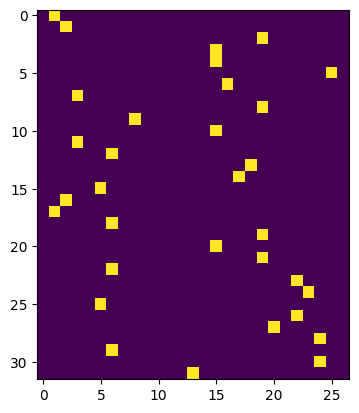

In [ ]:
plt.imshow(F.one_hot(logits.max(1).indices,num_classes=logits.shape[1]))

# `logit_maxes = logits.max(1, keepdim=True).values`

## `dlogits` branch 2

### Background:

The line of code:
$$
\text{logit_maxes} = \text{logits}.max(1, \text{keepdim=True}).values
$$

is used to find the maximum logit value for each instance in the batch. Essentially, for each instance (or row) of logits, it extracts the largest value. This is primarily done to ensure numerical stability in subsequent operations, especially when computing the softmax function.

### Intuition:

Now, remember that `logit_maxes` is just the maximum value from `logits`. When we backpropagate through this operation, only the maximum logit for each instance contributes to the gradient; all other logits have zero contribution because they didn't affect the output of the `max` function.

### Chain Rule Calculation:

Using the chain rule for differentiation, the gradient of the loss with respect to `logits` from the max operation is:

$$
\frac{\partial \text{loss}}{\partial \text{logits}} = \frac{\partial \text{loss}}{\partial \text{logit_maxes}} \times \frac{\partial \text{logit_maxes}}{\partial \text{logits}}
$$

Now, $ \frac{\partial \text{logit_maxes}}{\partial \text{logits}} $ is a bit special:

- It's 1 for the logit that was the maximum (because that logit directly influenced `logit_maxes`).
- It's 0 for all other logits (because they had no influence on `logit_maxes`).

### PyTorch Calculation:

The PyTorch way to compute the gradient $ d\text{logits} $ based on the operation is:

$$
d\text{logits}[i] =
\begin{cases}
d\text{logit_maxes}[i] & \text{if } \text{logits}[i] = \text{logit_maxes} \\
0 & \text{otherwise}
\end{cases}
$$

### Summary:

For the `max` operation, only the maximum value in the `logits` tensor has a gradient that affects the loss, and the gradient for all other values is 0. This is because the other values didn't contribute to the maximum and, therefore, had no direct influence on the loss.

# `logits = h @ W2 + b2`

In [ ]:
logits.shape, h.shape, W2.shape, b2.shape

(torch.Size([32, 27]),
 torch.Size([32, 64]),
 torch.Size([64, 27]),
 torch.Size([27]))

In [ ]:
dh = dlogits @ W2.T
dW2 = h.T @ dlogits
db2 = dlogits.sum(0)

cmp('h', dh, h)
cmp('W2', dW2, W2)
cmp('b2', db2, b2)

h               | exact: True  | approximate: True  | maxdiff: 0.0
W2              | exact: True  | approximate: True  | maxdiff: 0.0
b2              | exact: True  | approximate: True  | maxdiff: 0.0


## `dh, dW2 and dB2`

### Forward Propagation:

$ \text{logits} = h \times W2 + b2 $

Where:
- \( h \) is the output from the previous layer.
- \( W2 \) are the weights of this layer.
- \( b2 \) are the biases of this layer.

This is just a linear transformation (matrix multiplication followed by a bias addition).

### Backward Propagation:

#### 1. Gradient with respect to \( h \):

$$ \frac{\partial \text{loss}}{\partial h} = \frac{\partial \text{loss}}{\partial \text{logits}} \times W2^T $$

This comes from the chain rule. If you think of the matrix multiplication, when we backpropagate through it, the gradient gets distributed across the rows of the weight matrix. In terms of matrix operations, this is achieved by multiplying the gradient with respect to the output $ \text{logits} $ with the transpose of the weights $ W2^T $.

**Python code:**

```python
dh = dlogits @ W2.T
```

#### 2. Gradient with respect to \( W2 \):

$$ \frac{\partial \text{loss}}{\partial W2} = h^T \times \frac{\partial \text{loss}}{\partial \text{logits}} $$

Here, we're considering how much the change in each weight will affect the loss. For this, we need to look at the activations coming into the weight and the gradient of the loss with respect to the output. In matrix terms, this is achieved by multiplying the transpose of the incoming activations $ h^T $ with the gradient with respect to the output.

**Python code:**

```python
dW2 = h.T @ dlogits
```

#### 3. Gradient with respect to \( b2 \):

$$ \frac{\partial \text{loss}}{\partial b2} = \sum \frac{\partial \text{loss}}{\partial \text{logits}} $$

The bias gets added to each output, so its gradient is simply the sum of the gradients of the output it affects.

**Python code:**

```python
db2 = dlogits.sum(0)
```

**In summary:**

- The gradient with respect to the hidden state \( h \) is computed by distributing the gradients of the output across the weights.
- The gradient with respect to the weights \( W2 \) is found by seeing how the activations and the output gradients interact.
- The gradient for the biases \( b2 \) is the sum of the gradients of the outputs they affect.

# `h = torch.tanh(hpreact)`

In [ ]:
# a = tanh(z)
# da/dz = 1 - a**2

# h = torch.tanh(hpreact)
# dloss/dhpreact = dloss/dh * dh/dhpreact
# dhpreact = (1- dh**2) * dh

dhpreact = (1.0 - h**2) * dh
# dhpreact = dh * (1 - torch.tanh(hpreact)**2)
cmp('hpreact', dhpreact, hpreact)



hpreact         | exact: False | approximate: True  | maxdiff: 4.656612873077393e-10


`dhpreact`

### Forward Propagation:

The operation in the forward pass is:

$$ h = \tanh(h_{\text{preact}}) $$

Here, $ h_{\text{preact}} $ is the pre-activation output from the previous layer, and we apply the hyperbolic tangent $ \tanh $ function to get the activations, $ h $.

### Backward Propagation:

To understand the backward pass for the $ \tanh $ function, we must first understand the derivative of $ \tanh $:

$$ \frac{d}{dx} \tanh(x) = 1 - \tanh^2(x) $$

This derivative gives us the rate of change of $ \tanh $ at any point \( x \). When backpropagating, we'll use this derivative to find out how much the loss would change if we tweaked the value of $ h_{\text{preact}} $ just a little bit.

Now, for the chain rule:

$$ \frac{\partial \text{loss}}{\partial h_{\text{preact}}} = \frac{\partial \text{loss}}{\partial h} \times \frac{\partial h}{\partial h_{\text{preact}}} $$

Where:
- $ \frac{\partial \text{loss}}{\partial h} $ is the gradient of the loss with respect to \( h \) (which we would have from subsequent layers during backpropagation).
- $ \frac{\partial h}{\partial h_{\text{preact}}} $ is the gradient of \( h \) with respect to $ h_{\text{preact}} $, which is $ 1 - \tanh^2(h_{\text{preact}}) $ based on the derivative of the $ \tanh $ function.

Combining these, we get:

$$ \frac{\partial \text{loss}}{\partial h_{\text{preact}}} = \frac{\partial \text{loss}}{\partial h} \times (1 - \tanh^2(h_{\text{preact}})) $$

**Python code:**

```python
dhpreact = dh * (1 - torch.tanh(hpreact)**2)
```

**In summary:**

The gradient with respect to $ h_{\text{preact}} $ is calculated by multiplying the gradient of the loss with respect to \( h \) by the derivative of the $ \tanh $ function at $ h_{\text{preact}} $. This gives us a measure of how changes in $ h_{\text{preact}} $ would affect the overall loss.

# `hpreact = bngain * bnraw + bnbias`

In [ ]:
hpreact.shape, bngain.shape, bnraw.shape, bnbias.shape

(torch.Size([32, 64]),
 torch.Size([1, 64]),
 torch.Size([32, 64]),
 torch.Size([1, 64]))

In [ ]:
# hpreact = bngain * bnraw + bnbias

# dloss/dbngain = dbngain/dhpreact * dloss/dhpreact
# need sum because of shapes and make sure broadcasting is backpropagated
dbngain = (bnraw * dhpreact).sum(0, keepdims=True)

cmp('bngain', dbngain, bngain)
# cmp('bnbias', dbnbias, bnbias)
# cmp('bnraw', dbnraw, bnraw)

bngain          | exact: False | approximate: True  | maxdiff: 2.7939677238464355e-09


In [ ]:
# dloss/bnraw = bnraw/dhpreact * dloss/dhpreact
# don't need sum because of shapes
dbnraw = bngain * dhpreact

cmp('bnraw', dbnraw, bnraw)

bnraw           | exact: False | approximate: True  | maxdiff: 4.656612873077393e-10


In [ ]:
# dloss/bnbias = bnbias/dhpreact * dloss/dhpreact
# don't need sum because of shapes
dbnbias = dhpreact.sum(0, keepdims=True)

cmp('dbnbias', dbnbias, bnbias)

dbnbias         | exact: False | approximate: True  | maxdiff: 5.587935447692871e-09


## `dbngain, dbnbias, dbnraw`

$$ h_{\text{preact}} = \text{bngain} \times \text{bnraw} + \text{bnbias} $$

### Understanding the Equation:

1. $ h_{\text{preact}} $ is the output we get after applying batch normalization and before passing it through the activation function.
2. $ \text{bngain} $ and $ \text{bnbias} $ are learnable parameters in batch normalization. They are used to scale and shift the normalized output, respectively.
3. $ \text{bnraw} $ is the normalized output, which is the result of subtracting the mean and dividing by the standard deviation.

### Backward Propagation:

We want to determine how the loss changes with respect to $ \text{bngain} $, $ \text{bnraw} $, and $ \text{bnbias} $.

#### 1. Gradient with respect to $ \text{bngain} $:

Using the chain rule, the gradient with respect to $ \text{bngain} $ can be calculated as:

$$ \frac{\partial \text{loss}}{\partial \text{bngain}} = \frac{\partial \text{loss}}{\partial h_{\text{preact}}} \times \frac{\partial h_{\text{preact}}}{\partial \text{bngain}} $$

Given that:

$$ \frac{\partial h_{\text{preact}}}{\partial \text{bngain}} = \text{bnraw} $$

Combining them, we get:

$$ \frac{\partial \text{loss}}{\partial \text{bngain}} = \frac{\partial \text{loss}}{\partial h_{\text{preact}}} \times \text{bnraw} $$

#### 2. Gradient with respect to $ \text{bnraw} $:

Similarly, for $ \text{bnraw} $:

$$ \frac{\partial \text{loss}}{\partial \text{bnraw}} = \frac{\partial \text{loss}}{\partial h_{\text{preact}}} \times \frac{\partial h_{\text{preact}}}{\partial \text{bnraw}} $$

Given that:

$$ \frac{\partial h_{\text{preact}}}{\partial \text{bnraw}} = \text{bngain} $$

Combining them, we get:

$$ \frac{\partial \text{loss}}{\partial \text{bnraw}} = \frac{\partial \text{loss}}{\partial h_{\text{preact}}} \times \text{bngain} $$

#### 3. Gradient with respect to $ \text{bnbias} $:

The term $ \text{bnbias} $ is added directly to $ h_{\text{preact}} $, so:

$$ \frac{\partial \text{loss}}{\partial \text{bnbias}} = \frac{\partial \text{loss}}{\partial h_{\text{preact}}} $$

**Python code:**

```python
dbngain = (dhpreact * bnraw).sum(dim=0)
dbnraw = dhpreact * bngain
dbnbias = dhpreact.sum(dim=0)
```

**In Summary**:

- The gradient with respect to $ \text{bngain} $ tells us how much the loss would change if we adjust the scaling after normalization.
- The gradient with respect to $ \text{bnraw} $ indicates how the loss would change with changes to the normalized output.
- The gradient with respect to $ \text{bnbias} $ reveals the impact of the bias term in the batch normalization on the loss.

## The shapes of the tensors

The difference in behavior stems from the shapes of the tensors and the operations being performed. Let's dive into this by examining the shapes you've provided:

- `hpreact`: $ 32 \times 64 $ (batch size of 32, and 64 features or neurons)
- `bngain` and `bnbias`: $1 \times 64$ (broadcastable to $32 \times 64$)
- `bnraw`: $32 \times 64$

Given the equation:

$$ \text{hpreact} = \text{bngain} \times \text{bnraw} + \text{bnbias} $$

1. **For `bngain` and `bnbias`:**
    When `bngain` (or `bnbias`) is multiplied (or added) to `bnraw`, broadcasting is used due to their shape being $1 \times 64$. This means the same values of `bngain` are multiplied with each of the 32 examples in the batch for every feature. When you're calculating the gradient with respect to `bngain` (or `bnbias`), you're aggregating the effect across all examples in the batch for each feature. That's why you sum over the batch dimension, resulting in a tensor of shape $1 \times 64$, which matches the shape of `bngain` (or `bnbias`).

2. **For `bnraw`:**
    The gradient `dbnraw` has the same shape as `bnraw`, i.e., $32 \times 64$. Since `bnraw` is an intermediate result for each example in the batch and isn't shared across examples (unlike `bngain` and `bnbias`), there's no aggregation (sum) required over the batch dimension. Each example's `bnraw` value has its own gradient, and there's no need to sum them.

In essence, the sums for `bngain` and `bnbias` are due to the broadcasting during the forward pass. The same values of `bngain` and `bnbias` affect every example in the batch. Hence, during backpropagation, the gradients from each example in the batch need to be summed to get the total gradient for `bngain` and `bnbias`. On the other hand, `bnraw` is calculated individually for each example, so its gradients are also individual and don't need to be summed.

## Theoretical vs Practical Gradient Computation

The summation over the batch dimension in the PyTorch implementation addresses a subtle but crucial aspect of mini-batch gradient descent.

### Theoretical vs Practical Gradient Computation:

In the theoretical derivation, we look at the gradient computation for a single data point. When we compute the gradient for a mini-batch, it's essentially the average of the gradients for each individual data point in the mini-batch. The backward pass computes the gradients for each data point, and then we usually sum these gradients across the batch to get the total gradient for the mini-batch.

### Why the Summation?

When you perform mini-batch gradient descent, you're averaging the loss across the batch. Thus, the gradient for each parameter is an average gradient over the batch. The sum operation is essentially summing up the gradients for each data point in the batch for each parameter.

In the specific context of batch normalization:

1. **dbngain**: The gradient with respect to `bngain` is affected by every example in the batch. For each example, we have a gradient value. To get the overall gradient for `bngain` for the entire batch, we sum across all these individual gradients. This gives us a single gradient value for `bngain` which will be used for the update.

2. **dbnbias**: Similarly, the gradient with respect to `bnbias` is affected by every example in the batch. Summing across all examples gives us the total gradient for `bnbias`.

### Important Note:

It's worth noting that, after summing, many deep learning frameworks, including PyTorch, will often divide by the batch size if you're computing the mean loss over the batch. This effectively averages the summed gradients, which scales them appropriately for the update. Whether you sum (as in the code provided) or average depends on how the forward pass (loss computation) is structured and how you plan to apply the gradient updates.

In the provided code, the summation effectively calculates the total gradient for the batch. If you were to subsequently average your gradients, you'd divide by the batch size during the update step.

# `bnraw = bndiff * bnvar_inv`

In [ ]:
bnraw.shape, bndiff.shape, bnvar_inv.shape

(torch.Size([32, 64]), torch.Size([32, 64]), torch.Size([1, 64]))

In [ ]:
# bnraw = bndiff * bnvar_inv

# dloss/bndiff = dbnvar_inv/bdndiff * dbndiff/dbraw

dbndiff = bnvar_inv * dbnraw


In [ ]:
# bnraw = bndiff * bnvar_inv

# dloss/dbnvar_inv = dbnraw/dbnvar_inv * dloss/dbnraw

dbnvar_inv = (bndiff * dbnraw).sum(0, keepdims=True)
cmp('bnvar_inv', dbnvar_inv, bnvar_inv)

bnvar_inv       | exact: False | approximate: True  | maxdiff: 7.450580596923828e-09


## `dbnvar_inv, bdndiff`

Let's break down the backpropagation through the equation:

$$ \text{bnraw} = \text{bndiff} \times \text{bnvar_inv} $$

Given that we already have $ \frac{\partial \text{loss}}{\partial \text{bnraw}} $ (denoted as `dbnraw` for simplicity), we need to find $ \frac{\partial \text{loss}}{\partial \text{bndiff}} $ and $ \frac{\partial \text{loss}}{\partial \text{bnvar_inv}} $.

### 1. Gradient with respect to `bndiff`:

Using the chain rule:

$$ \frac{\partial \text{loss}}{\partial \text{bndiff}} = \frac{\partial \text{loss}}{\partial \text{bnraw}} \times \frac{\partial \text{bnraw}}{\partial \text{bndiff}} $$

Given that $ \text{bnraw} $ is a product of $ \text{bndiff} $ and $ \text{bnvar\_inv} $, the gradient is simply:

$$ \frac{\partial \text{bnraw}}{\partial \text{bndiff}} = \text{bnvar_inv} $$

Therefore, in PyTorch:

```python
dbndiff = dbnraw * bnvar_inv
```

### 2. Gradient with respect to `bnvar_inv`:

Using the chain rule:

$$ \frac{\partial \text{loss}}{\partial \text{bnvar_inv}} = \frac{\partial \text{loss}}{\partial \text{bnraw}} \times \frac{\partial \text{bnraw}}{\partial \text{bnvar_inv}} $$

Given that $ \text{bnraw} $ is a product of $ \text{bndiff} $ and $ \text{bnvar_inv} $, the gradient is:

$$ \frac{\partial \text{bnraw}}{\partial \text{bnvar_inv}} = \text{bndiff} $$

Therefore, in PyTorch:

```python
dbnvar_inv = (dbnraw * bndiff).sum(dim=0, keepdim=True)
```

The `sum` operation is used here because during the forward pass, `bnvar_inv` (of shape $1 \times \text{features}$) gets broadcasted to match the shape of `bndiff` (of shape $ \text{batch_size} \times \text{features} $), and thus, during the backward pass, we aggregate the gradients across the batch dimension to match the original shape of `bnvar_inv`.

In summary, `dbndiff` and `dbnvar_inv` represent the gradients of the loss with respect to `bndiff` and `bnvar_inv` respectively, and they are calculated using the chain rule based on the operations performed during the forward pass.

# `bnvar_inv = (bnvar + 1e-5)**-0.5`

In [ ]:
# bnvar_inv = (bnvar + 1e-5)**-0.5

# power rule then chain rule

# dbnvar = (local derivative of bnvar) * dbnvar_inv

dbnvar = (-0.5*(bnvar + 1e-5)**-1.5) * dbnvar_inv

cmp('bnvar', dbnvar, bnvar)

bnvar           | exact: False | approximate: True  | maxdiff: 1.862645149230957e-09


## `dbnvar`

Let's delve into the backpropagation for the equation:

$$ \text{bnvar_inv} = (\text{bnvar} + 1 \times 10^{-5})^{-0.5} $$

Given that we already have $ \frac{\partial \text{loss}}{\partial \text{bnvar_inv}} $ (denoted as `dbnvar_inv` for clarity), we want to compute $ \frac{\partial \text{loss}}{\partial \text{bnvar}} $, or `dbnvar`.

### Deriving the gradient with respect to `bnvar`:

Using the chain rule:

$$ \frac{\partial \text{loss}}{\partial \text{bnvar}} = \frac{\partial \text{loss}}{\partial \text{bnvar_inv}} \times \frac{\partial \text{bnvar_inv}}{\partial \text{bnvar}} $$

The partial derivative $ \frac{\partial \text{bnvar_inv}}{\partial \text{bnvar}} $ is derived from the given function. Taking the derivative of $ \text{bnvar_inv} $ with respect to $ \text{bnvar} $ using **The Power Rule**  gives:

$$ \frac{\partial \text{bnvar_inv}}{\partial \text{bnvar}} = -0.5 (\text{bnvar} + 1 \times 10^{-5})^{-1.5} $$

Now, combining this with our known `dbnvar_inv`, we get:

$$ \frac{\partial \text{loss}}{\partial \text{bnvar}} = \text{dbnvar_inv} \times (-0.5 (\text{bnvar} + 1 \times 10^{-5})^{-1.5}) $$

### In PyTorch:

```python
dbnvar = dbnvar_inv * (-0.5 * (bnvar + 1e-5)**-1.5)
```

In essence, `dbnvar` represents the gradient of the loss with respect to `bnvar`. This gradient is computed by multiplying the gradient with respect to `bnvar_inv` (which we already have) by the derivative of the function that computes `bnvar_inv` from `bnvar`.

# `bnvar = 1/(n-1)*(bndiff2).sum(0, keepdim=True)`

In [ ]:
# bnvar = 1/(n-1)*(bndiff2).sum(0, keepdim=True)

In [ ]:
bnvar.shape, bndiff2.shape, n

(torch.Size([1, 64]), torch.Size([32, 64]), 32)

In [ ]:
(bndiff2).sum(0, keepdim=True).shape

torch.Size([1, 64])

In [ ]:
# alternative implementation

# dbndiff2 = (1.0 / (n - 1))*torch.ones_like(bndiff2) * dbnvar

In [ ]:
dbndiff2 = dbnvar * (1.0 / (n - 1))
cmp('bndiff2', dbndiff2, bndiff2)

bndiff2         | exact: False | approximate: True  | maxdiff: 5.820766091346741e-11


## `dbndiff2`

Let's break down the backpropagation for the equation:

$$ \text{bnvar} = \frac{1}{n-1} \sum_{i} \text{bndiff2}_i $$

Given that we already have $ \frac{\partial \text{loss}}{\partial \text{bnvar}} $ (denoted as `dbnvar`), we want to compute $ \frac{\partial \text{loss}}{\partial \text{bndiff2}} $, or `dbndiff2`.

### Deriving the gradient with respect to `bndiff2`:

Using the chain rule:

$$ \frac{\partial \text{loss}}{\partial \text{bndiff2}_i} = \frac{\partial \text{loss}}{\partial \text{bnvar}} \times \frac{\partial \text{bnvar}}{\partial \text{bndiff2}_i} $$

For each element `i` in the batch, the partial derivative $ \frac{\partial \text{bnvar}}{\partial \text{bndiff2}_i} $ is simply $ \frac{1}{n-1} $. This is because the summation in the equation for `bnvar` essentially adds up each element of `bndiff2`, and the gradient with respect to each element is the coefficient in front of the summation, which is $ \frac{1}{n-1} $.

Using the power rule:

$$ \frac{\partial \text{loss}}{\partial \text{bndiff2}} = \text{dbnvar} \times \frac{1}{n-1} $$

### In PyTorch:

Considering the shapes involved:

- `dbnvar`: (1, 64)
- `bndiff2`: (32, 64)

Since `dbnvar` needs to be applied to each instance in the batch, broadcasting will be employed when we perform the multiplication:

```python
dbndiff2 = dbnvar * (1.0 / (n - 1))
```

Here, `dbndiff2` is the gradient of the loss with respect to `bndiff2`, and it's computed by multiplying the gradient with respect to `bnvar` (which we already have) by the coefficient $ \frac{1}{n-1} $. Broadcasting takes care of applying this coefficient to each batch element.

## `Bessel's Correction`

When you have a set of data and you want to estimate its variance, you often use the formula:

$$ \text{variance} = \frac{\sum_{i=1}^{n} (x_i - \text{mean})^2}{n} $$

However, when using this formula on a sample from a larger population (rather than the entire population itself), it tends to slightly underestimate the actual variance of the whole population. This is particularly noticeable when the sample size is small.

Bessel's Correction is a simple adjustment to correct this bias. Instead of dividing by \( n \) (the number of data points), we divide by \( n-1 \):

$$ \text{corrected variance} = \frac{\sum_{i=1}^{n} (x_i - \text{mean})^2}{n-1} $$

**Why "n-1" and not "n"?**

Imagine you're measuring the height of students in a classroom to estimate the average height of all students in the school. If you only measure 2 students, the average of their heights will match one of the student's heights exactly. So, your estimation of the variability (variance) based on these 2 students will be lower than the actual variance in the whole school.

By using \( n-1 \), we're essentially giving more "weight" to the variability we've observed in our sample, making our estimate a bit larger and, on average, more accurate.

### Summary:

Bessel's Correction is like giving your sample variance a small boost to make it a better estimate of the entire population's variance, especially when working with small samples. It's a statistical tweak to ensure our variance estimate isn't too optimistic (or low).

# `bnvar = 1/(n-1)*(bndiff2).sum(0, keepdim=True)`

In [ ]:
bndiff2.shape, bndiff.shape

(torch.Size([32, 64]), torch.Size([32, 64]))

In [ ]:
# bndiff2 = bndiff**2

# branc 1
dbndiff = bnvar_inv * dbnraw

dbndiff += 2.0 * bndiff * dbndiff2

cmp('bndiff', dbndiff, bndiff)

bndiff          | exact: False | approximate: True  | maxdiff: 4.656612873077393e-10


# `bndiff2 = bndiff**2`


In [ ]:
dbndiff = 2 * bndiff * dbndiff2

## `dnbdiff`

Let's break down the process of backpropagation through the operation $ \text{bndiff}^2 $.

### Forward Pass:
You have a tensor, $ \text{bndiff} $, and you square each element in this tensor to get $ \text{bndiff}^2 $.

### Mathematical Representation:
$$ \text{bndiff2}_i = \text{bndiff}_i^2 $$

Where $ i $ is the index of a specific element in our tensors.

### Backward Pass:
To find how the loss $ L $ changes with respect to $ \text{bndiff} $, you'd want to know how a small change in $ \text{bndiff} $ affects $ L $ through $ \text{bndiff}^2 $. This is essentially finding the gradient $ \frac{\partial L}{\partial \text{bndiff}_i} $.

Using the chain rule and the power rule of differentiation, we can compute the gradient:

$$ \frac{\partial L}{\partial \text{bndiff}_i} = \frac{\partial L}{\partial \text{bndiff2}_i} \times \frac{\partial \text{bndiff2}_i}{\partial \text{bndiff}_i} $$

Now, focusing on the second term, the derivative of $ \text{bndiff}_i^2 $ with respect to $ \text{bndiff}_i $ is:

$$ \frac{\partial \text{bndiff2}_i}{\partial \text{bndiff}_i} = 2 \times \text{bndiff}_i $$

### PyTorch Implementation:
Given that we already have $ \frac{\partial L}{\partial \text{bndiff2}} $ (let's call this tensor $ \text{dbndiff2} $), we can compute $ \frac{\partial L}{\partial \text{bndiff}} $ (or $ \text{dbndiff} $) as:

```python
dbndiff = 2 * bndiff * dbndiff2
```

### Summary:
Squaring operations amplify the effects of the original values. During backpropagation, this operation effectively scales the gradients by $ 2 \times \text{bndiff} $, making larger values in $ \text{bndiff} $ have even larger gradients and, thus, larger updates during optimization.

# `bndiff = hprebn - bnmeani`

In [ ]:
bndiff.shape, hprebn.shape, bnmeani.shape

(torch.Size([32, 64]), torch.Size([32, 64]), torch.Size([1, 64]))

In [ ]:
# bndiff = hprebn - bnmeani

dbnmeani = -dbndiff.sum(dim=0, keepdim=True)

cmp('bnmeani', dbnmeani, bnmeani)

# cmp('hprebn', dhprebn, hprebn)



bnmeani         | exact: False | approximate: True  | maxdiff: 3.725290298461914e-09


In [ ]:
# bndiff = hprebn - bnmeani

dhprebn = dbndiff.clone()

cmp('hprebn', dhprebn, hprebn)


hprebn          | exact: False | approximate: False | maxdiff: 0.0011816248297691345


## `hprebn` and `bnmeani`

Let's look at the subtraction operation and understand its gradient propagation.

### Forward Pass:
You have two tensors, `hprebn` and `bnmeani`. You subtract `bnmeani` from each row of `hprebn` to get the tensor `bndiff`.

### Mathematical Representation:
For each element in the tensor:
$$ \text{bndiff}_{ij} = \text{hprebn}_{ij} - \text{bnmeani}_{j} $$
Where \( i \) represents the batch index and \( j \) represents the feature index.

### Backward Pass:

1. **Gradient with respect to hprebn ($ \text{dhprebn} $):** For each element in `hprebn`, its contribution to the corresponding element in `bndiff` is +1. Hence, the gradient of `bndiff` with respect to `hprebn` is an identity operation. In other words, the gradient simply "passes through" without any change.
   
   Mathematical representation:
   $$ \frac{\partial \text{bndiff}_{ij}}{\partial \text{hprebn}_{ij}} = 1 $$
   
   So, the gradient $ \text{dhprebn} $ is:
   $$ \text{dhprebn}_{ij} = \text{dbndiff}_{ij} $$

2. **Gradient with respect to bnmeani ($ \text{dbnmeani} $):** Now, for `bnmeani`, each element in `bnmeani` affects all rows of `bndiff` in the corresponding column. The contribution of each element in `bnmeani` to `bndiff` is -1. Since each element in `bnmeani` affects all the rows in `bndiff`, the gradient for each element in `bnmeani` is the sum of gradients for all rows in `bndiff` for the corresponding column.

   Mathematical representation:
   $$ \frac{\partial \text{bndiff}_{ij}}{\partial \text{bnmeani}_{j}} = -1 $$
   
   Summing over all rows (batch dimension):
   $$ \text{dbnmeani}_{j} = \sum_{i} (-\text{dbndiff}_{ij}) $$

### PyTorch Implementation:
Given that we already have $ \text{dbndiff} $, we can compute $ \text{dhprebn} $ and $ \text{dbnmeani} $ as:

```python
dhprebn = dbndiff
dbnmeani = -dbndiff.sum(dim=0, keepdim=True)
```

### Summary:
The operation `hprebn - bnmeani` is a simple subtraction where the gradient for `hprebn` just "passes through" and for `bnmeani`, the gradient is aggregated (summed up) across the batch dimension since `bnmeani` affects all rows of `bndiff`. The broadcasting in the forward operation (subtracting a [1, 64] tensor from a [32, 64] tensor) gets reflected as a sum in the backward pass.

## Addition and subtraction operations in

Addition and subtraction operations are among the simplest in terms of backpropagation due to their straightforward derivatives. Here's a brief explanation:

Similarly for \( b \).
1. **Addition**:
  If you have a function f = a + b , the derivative with respect to both \( a \) and \( b \) is 1. This means that any change in \( a \) or \( b \) has a direct 1-to-1 effect on \( f \). During backpropagation, the gradient simply "passes through" the addition operation without any modification.
  
  Chain rule for addition:
  $$
  \frac{\partial f}{\partial a} = \frac{\partial f}{\partial f} \times \frac{\partial f}{\partial a} = 1 \times 1 = 1
  $$
  Similarly for \( b \).

2. **Subtraction**:
  If you have a function \( g = a - b \), the derivative with respect to \( a \) is 1, while with respect to \( b \), it's -1. This means that an increase in \( a \) increases \( g \) directly, while an increase in \( b \) decreases \( g \). During backpropagation, the gradient again "passes through" for \( a \) but with a sign change for \( b \).
  
  Chain rule for subtraction:
  $$
  \frac{\partial g}{\partial a} = \frac{\partial g}{\partial g} \times \frac{\partial g}{\partial a} = 1 \times 1 = 1
  $$
  And:
  $$
  \frac{\partial g}{\partial b} = \frac{\partial g}{\partial g} \times \frac{\partial g}{\partial b} = 1 \times (-1) = -1
  $$

So, while we technically apply the chain rule for all operations during backpropagation, the nature of addition and subtraction makes their chain rule applications particularly straightforward. The gradients essentially propagate back without modification for addition and with just a sign change for subtraction.

# `bnmeani = 1/n*hprebn.sum(0, keepdim=True)`

In [ ]:
bnmeani = 1/n*hprebn.sum(0, keepdim=True)

dhprebn += (1/n)* dbnmeani

# dhprebn += (1.0/n) * torch.ones_like(hprebn)

cmp('hprebn', dhprebn, hprebn)

# dloss/dhprebn = dbnmeani/dhprebn * dloss/dbmeani

hprebn          | exact: False | approximate: True  | maxdiff: 6.984919309616089e-10


In [ ]:
bnmeani.shape, hprebn.shape, hprebn.sum(0, keepdim=True).shape

(torch.Size([1, 64]), torch.Size([32, 64]), torch.Size([1, 64]))

In [ ]:
dhprebn.shape

torch.Size([32, 64])

## `dhprebn`

The operation in the given line calculates the mean of `hprebn` across the batch (i.e., the first dimension). Specifically, for every feature (or neuron) in the hidden layer, it calculates the average activation across all examples in the batch.

Mathematically:
$$ \text{bnmeani}_j = \frac{1}{n} \sum_{i=1}^{n} \text{hprebn}_{ij} $$
Where:
- \( i \) is the index that runs over the batch size.
- \( j \) is the index that runs over the feature dimension (in this case, 64).

The above equation computes the mean for a single feature \( j \). This operation is repeated for all features.

### Backpropagation:

We want to compute: $ \frac{\partial \text{bnmeani}_j}{\partial \text{hprebn}_{ij}} $.

Given that bnmeani is a mean, the derivative of the mean with respect to any one of the terms being averaged is $ \frac{1}{n} $. This is because if you were to slightly change one of the terms in the sum (i.e., one of the hprebn values), it would change the mean by that amount divided by the number of terms (n).

### Intuition:
Imagine you and your friends are splitting the bill at a restaurant, and you decide to contribute a bit more to the total amount (a small increase in one of the hprebn values). The average contribution (bnmeani) will only increase by your extra amount divided by the number of friends (including you).

### In terms of tensors:
Given the shapes `hprebn.shape = torch.Size([32, 64])` and `bnmeani.shape = torch.Size([1, 64])`, the gradient $ \frac{\partial \text{bnmeani}}{\partial \text{hprebn}} $ will have the shape of `hprebn`, which is `[32, 64]`.

For every feature \( j \), all 32 values in the batch dimension of `hprebn` for that feature would have a gradient of $ \frac{1}{32} $ (because $ n = 32 $).

### PyTorch code:
```python
dhprebn = (1.0/n) * torch.ones_like(hprebn)
```

This code will create a tensor with the same shape as `hprebn` where every entry is $ \frac{1}{32} $.

# `hprebn = embcat @ W1 + b1`

In [ ]:
# hprebn = embcat @ W1 + b1

# cmp('embcat', dembcat, embcat)
# cmp('W1', dW1, W1)
# cmp('b1', db1, b1)

In [ ]:
hprebn.shape, embcat.shape, W1.shape, b1.shape

(torch.Size([32, 64]),
 torch.Size([32, 30]),
 torch.Size([30, 64]),
 torch.Size([64]))

In [ ]:
dembcat = dhprebn @ W1.T

cmp('embcat', dembcat, embcat)

embcat          | exact: False | approximate: True  | maxdiff: 1.862645149230957e-09


In [ ]:
dW1 = embcat.T @ dhprebn
cmp('W1', dW1, W1)

W1              | exact: False | approximate: True  | maxdiff: 7.450580596923828e-09


In [ ]:
db1 = dhprebn.sum(0)
cmp('db1', db1, b1)

db1             | exact: False | approximate: True  | maxdiff: 3.725290298461914e-09


## `dembcat`, `dW1` and `db1`

Let's break down the backpropagation for the equation:

$$ \text{hprebn} = \text{embcat} @ \text{W1} + \text{b1} $$

Here, the "@" symbol represents matrix multiplication.

### 1. $ \frac{\partial \text{hprebn}}{\partial \text{embcat}} $ (Gradient with respect to `embcat`):

If you think of `embcat @ W1` as a series of dot products, then for each neuron in `hprebn`, its value is influenced by every element in `embcat` through the weights in `W1`.

The gradient of a given neuron in `hprebn` with respect to `embcat` is just the corresponding column in `W1`. This is because a change in a particular element of `embcat` would affect the output neuron linearly according to the weight connecting them.

Thus, when you consider the entire matrix `hprebn` (batch_size x hidden_size), its gradient with respect to `embcat` (batch_size x (n_embd * block_size)) will be given by:

$$ \frac{\partial \text{hprebn}}{\partial \text{embcat}} = \text{W1}^T $$

The transpose is due to the way matrix multiplication works.

### PyTorch code:
```python
dembcat = dhprebn @ W1.T
```

### 2. $ \frac{\partial \text{hprebn}}{\partial \text{W1}} $ (Gradient with respect to `W1`):

For each weight in `W1`, its influence on a given neuron in `hprebn` is proportional to the value of the corresponding input neuron in `embcat`.

When considering the entire matrix of weights `W1`, the gradient will be the outer product of the gradient of `hprebn` with respect to its input and the input itself (`embcat`).

### PyTorch code:
```python
dW1 = embcat.T @ dhprebn
```

### 3. $ \frac{\partial \text{hprebn}}{\partial \text{b1}} $ (Gradient with respect to `b1`):

Each bias in `b1` just gets added to the corresponding neuron in `hprebn`. So, the gradient of `hprebn` with respect to `b1` is a vector of ones for each example in the batch, summed across the batch dimension.

### PyTorch code:
```python
db1 = dhprebn.sum(dim=0)
```

In summary:
- `dembcat` shows how much `hprebn` changes with a change in `embcat`.
- `dW1` shows how much `hprebn` changes with a change in `W1`.
- `db1` shows how much `hprebn` changes with a change in `b1`.

# `embcat = emb.view(emb.shape[0], -1)`

In [ ]:
embcat.shape, emb.shape, emb.view(emb.shape[0], -1).shape

(torch.Size([32, 30]), torch.Size([32, 3, 10]), torch.Size([32, 30]))

In [ ]:
# embcat = emb.view(emb.shape[0], -1)

demb = dembcat.view(emb.shape)
cmp('emb', demb, emb)

emb             | exact: False | approximate: True  | maxdiff: 1.862645149230957e-09


## `demb`

Let's understand the operation:

$$ \text{embcat} = \text{emb}.view(\text{emb}.shape[0], -1) $$

This line takes the 3D tensor `emb` with shape (batch_size, sequence_length, embedding_size) and reshapes it into a 2D matrix `embcat` with shape (batch_size, sequence_length * embedding_size).

The backpropagation process here is straightforward: since the `view()` operation doesn't change the values in the tensor, but only rearranges them, the gradient simply flows back to the positions they were originally in.

### $ \frac{\partial \text{embcat}}{\partial \text{emb}} $ (Gradient with respect to `emb`):

The gradient with respect to `emb` is just the gradient of `embcat` reshaped back to the original shape of `emb`.

In more intuitive terms:
- If a particular value in `embcat` influences the loss by some amount, the same value (which came from `emb`) in `emb` influences the loss by the same amount.
- The reshaping operation is just about rearranging these values, so the gradients merely "follow" these values back to their original positions.

### PyTorch code:
```python
demb = dembcat.view(emb.shape)
```

In summary:
- The gradient `demb` shows how much the loss changes with a change in `emb`, and it's simply the gradient of `embcat` reshaped back to the shape of `emb`.

# `emb = C[Xb]`

In [ ]:
emb.shape, C.shape, Xb.shape

(torch.Size([32, 3, 10]), torch.Size([27, 10]), torch.Size([32, 3]))

In [ ]:
Xb[:5]

tensor([[ 1,  1,  4],
        [18, 14,  1],
        [11,  5,  9],
        [ 0,  0,  1],
        [12, 15, 14]])

In [ ]:
# emb = C[Xb]

# dC = torch.zeros_like(C)
# dC.index_add_(0, Xb.view(-1), demb.view(-1, C.shape[1]))

dC = torch.zeros_like(C)
for k in range(Xb.shape[0]):
  for j in range(Xb.shape[1]):
    ix = Xb[k,j]
    dC[ix] += demb[k,j]


cmp('C', dC, C)

C               | exact: False | approximate: True  | maxdiff: 5.587935447692871e-09


`dC`

The operation in focus is:

$$ \text{emb} = C[Xb] $$

This line essentially means that we're indexing into the embedding matrix \( C \) using the indices in \( Xb \). For each row in \( Xb \), we're pulling out a corresponding row from \( C \) to construct $ \text{emb} $.

### Understanding the Gradient Flow:

1. The gradient with respect to the embeddings matrix \( C \), denoted as \( dC \), tells us how much the loss would change for a tiny change in the values of \( C \).
2. The gradient $ d\text{emb} $ tells us how much the loss changes for a tiny change in the values of $ \text{emb} $.

Now, since each row of $ \text{emb} $ is just a row from \( C \), the gradient for that particular row in \( C \) would be the gradient for the corresponding row in $ \text{emb} $. If multiple rows in $ \text{emb} $ correspond to the same row in \( C \) (due to repeated indices in \( Xb \)), the gradients for those rows in $ \text{emb} $ would accumulate for that row in \( C \).

In simpler terms:
- If a particular embedding from \( C \) was used multiple times to construct $ \text{emb} $, then the gradient for that embedding in \( C \) would be the sum of the gradients for all those times it was used.

### PyTorch code:
```python
dC = torch.zeros_like(C)
dC.index_add_(0, Xb.view(-1), demb.view(-1, C.shape[1]))
```

- The `index_add_` function accumulates the gradients from `demb` into the appropriate rows of `dC` based on the indices in `Xb`.

In summary:
- The gradient \( dC \) represents how much the loss changes with respect to changes in the embeddings matrix \( C \). For each embedding in \( C \) that was used to construct $ \text{emb} $, its gradient is either the gradient of the corresponding row in $ \text{emb} $ or the sum of multiple such gradients if that embedding was used multiple times.

# Summary of answers to Exercise 1

In [ ]:
# Exercise 1: backprop through the whole thing manually,
# backpropagating through exactly all of the variables
# as they are defined in the forward pass above, one by one

# -----------------
# YOUR CODE HERE :)
# -----------------

cmp('logprobs', dlogprobs, logprobs)
cmp('probs', dprobs, probs)
cmp('counts_sum_inv', dcounts_sum_inv, counts_sum_inv)
cmp('counts_sum', dcounts_sum, counts_sum)
cmp('counts', dcounts, counts)
cmp('norm_logits', dnorm_logits, norm_logits)
cmp('logit_maxes', dlogit_maxes, logit_maxes)
cmp('logits', dlogits, logits)
cmp('h', dh, h)
cmp('W2', dW2, W2)
cmp('b2', db2, b2)
cmp('hpreact', dhpreact, hpreact)
cmp('bngain', dbngain, bngain)
cmp('bnbias', dbnbias, bnbias)
cmp('bnraw', dbnraw, bnraw)
cmp('bnvar_inv', dbnvar_inv, bnvar_inv)
cmp('bnvar', dbnvar, bnvar)
cmp('bndiff2', dbndiff2, bndiff2)
cmp('bndiff', dbndiff, bndiff)
# cmp('bnmeani', dbnmeani, bnmeani)
cmp('hprebn', dhprebn, hprebn)
cmp('embcat', dembcat, embcat)
cmp('W1', dW1, W1)
cmp('b1', db1, b1)
cmp('emb', demb, emb)
cmp('C', dC, C)

logprobs        | exact: True  | approximate: True  | maxdiff: 0.0
probs           | exact: True  | approximate: True  | maxdiff: 0.0
counts_sum_inv  | exact: True  | approximate: True  | maxdiff: 0.0
counts_sum      | exact: True  | approximate: True  | maxdiff: 0.0
counts          | exact: True  | approximate: True  | maxdiff: 0.0
norm_logits     | exact: True  | approximate: True  | maxdiff: 0.0
logit_maxes     | exact: True  | approximate: True  | maxdiff: 0.0
logits          | exact: True  | approximate: True  | maxdiff: 0.0
h               | exact: True  | approximate: True  | maxdiff: 0.0
W2              | exact: True  | approximate: True  | maxdiff: 0.0
b2              | exact: True  | approximate: True  | maxdiff: 0.0
hpreact         | exact: False | approximate: True  | maxdiff: 4.656612873077393e-10
bngain          | exact: False | approximate: True  | maxdiff: 1.862645149230957e-09
bnbias          | exact: False | approximate: True  | maxdiff: 3.725290298461914e-09
bnraw   

In [ ]:
# emb = C[Xb] # embed the characters into vectors
# embcat = emb.view(emb.shape[0], -1) # concatenate the vectors
# hprebn = embcat @ W1 + b1 # hidden layer pre-activation
# bnmeani = 1/n*hprebn.sum(0, keepdim=True)
# bndiff = hprebn - bnmeani
# bndiff2 = bndiff**2
# bnvar = 1/(n-1)*(bndiff2).sum(0, keepdim=True)
# bnvar_inv = (bnvar + 1e-5)**-0.5
# bnraw = bndiff * bnvar_inv
# hpreact = bngain * bnraw + bnbias
# h = torch.tanh(hpreact) # hidden layer
# logits = h @ W2 + b2 # output layer
# logit_maxes = logits.max(1, keepdim=True).values
# norm_logits = logits - logit_maxes
# counts = norm_logits.exp()
# counts_sum = counts.sum(1, keepdims=True)
# counts_sum_inv = counts_sum**-1
# probs = counts * counts_sum_inv
# logprobs = probs.log()
# loss = -logprobs[range(n), Yb].mean()

dlogprobs = torch.zeros_like(logprobs)
dlogprobs[range(n), Yb] = -1.0/n
dprobs = (1/probs) * dlogprobs
dcounts_sum_inv = (counts * dprobs).sum(1, keepdims=True)
dcounts_sum = (-counts_sum**-2)* dcounts_sum_inv
dcounts = counts_sum_inv * dprobs
dcounts += torch.ones_like(counts) * dcounts_sum
dnorm_logits = dcounts * counts
dlogit_maxes = (-dnorm_logits).sum(1, keepdims=True)
dlogits = dnorm_logits.clone()
dlogits += F.one_hot(logits.max(1).indices,num_classes=logits.shape[1]) * dlogit_maxes
dh = dlogits @ W2.T
dW2 = h.T @ dlogits
db2 = dlogits.sum(0)
dhpreact = (1.0 - h**2) * dh
dbngain = (bnraw * dhpreact).sum(0, keepdims=True)
dbnraw = bngain * dhpreact
dbnbias = dhpreact.sum(0, keepdims=True)
dbndiff = bnvar_inv * dbnraw
dbnvar_inv = (bndiff * dbnraw).sum(0, keepdims=True)
dbnvar = (-0.5*(bnvar + 1e-5)**-1.5) * dbnvar_inv
dbndiff2 = dbnvar * (1.0 / (n - 1))
dbndiff += 2.0 * bndiff * dbndiff2
dhprebn = dbndiff
dbnmeani = -dbndiff.sum(dim=0, keepdim=True)
dhprebn += (1.0/n) * torch.ones_like(hprebn)
dembcat = dhprebn @ W1.T
dW1 = embcat.T @ dhprebn
db1 = dhprebn.sum(0)
cmp('emb', demb, emb)
dC = torch.zeros_like(C)
for k in range(Xb.shape[0]):
  for j in range(Xb.shape[1]):
    ix = Xb[k,j]
    dC[ix] += demb[k,j]

emb             | exact: False | approximate: True  | maxdiff: 1.862645149230957e-09


In [ ]:
dlogprobs = torch.zeros_like(logprobs)
dlogprobs[range(n), Yb] = -1.0/n
dprobs = (1.0 / probs) * dlogprobs
dcounts_sum_inv = (counts * dprobs).sum(1, keepdim=True)
dcounts = counts_sum_inv * dprobs
dcounts_sum = (-counts_sum**-2) * dcounts_sum_inv
dcounts += torch.ones_like(counts) * dcounts_sum
dnorm_logits = counts * dcounts
dlogits = dnorm_logits.clone()
dlogit_maxes = (-dnorm_logits).sum(1, keepdim=True)
dlogits += F.one_hot(logits.max(1).indices, num_classes=logits.shape[1]) * dlogit_maxes
dh = dlogits @ W2.T
dW2 = h.T @ dlogits
db2 = dlogits.sum(0)
dhpreact = (1.0 - h**2) * dh
dbngain = (bnraw * dhpreact).sum(0, keepdim=True)
dbnraw = bngain * dhpreact
dbnbias = dhpreact.sum(0, keepdim=True)
dbndiff = bnvar_inv * dbnraw
dbnvar_inv = (bndiff * dbnraw).sum(0, keepdim=True)
dbnvar = (-0.5*(bnvar + 1e-5)**-1.5) * dbnvar_inv
dbndiff2 = (1.0/(n-1))*torch.ones_like(bndiff2) * dbnvar
dbndiff += (2*bndiff) * dbndiff2
dhprebn = dbndiff.clone()
dbnmeani = (-dbndiff).sum(0)
dhprebn += 1.0/n * (torch.ones_like(hprebn) * dbnmeani)
dembcat = dhprebn @ W1.T
dW1 = embcat.T @ dhprebn
db1 = dhprebn.sum(0)
demb = dembcat.view(emb.shape)
dC = torch.zeros_like(C)
for k in range(Xb.shape[0]):
  for j in range(Xb.shape[1]):
    ix = Xb[k,j]
    dC[ix] += demb[k,j]

cmp('logprobs', dlogprobs, logprobs)
cmp('probs', dprobs, probs)
cmp('counts_sum_inv', dcounts_sum_inv, counts_sum_inv)
cmp('counts_sum', dcounts_sum, counts_sum)
cmp('counts', dcounts, counts)
cmp('norm_logits', dnorm_logits, norm_logits)
cmp('logit_maxes', dlogit_maxes, logit_maxes)
cmp('logits', dlogits, logits)
cmp('h', dh, h)
cmp('W2', dW2, W2)
cmp('b2', db2, b2)
cmp('hpreact', dhpreact, hpreact)
cmp('bngain', dbngain, bngain)
cmp('bnbias', dbnbias, bnbias)
cmp('bnraw', dbnraw, bnraw)
cmp('bnvar_inv', dbnvar_inv, bnvar_inv)
cmp('bnvar', dbnvar, bnvar)
cmp('bndiff2', dbndiff2, bndiff2)
cmp('bndiff', dbndiff, bndiff)
# cmp('bnmeani', dbnmeani, bnmeani)
cmp('hprebn', dhprebn, hprebn)
cmp('embcat', dembcat, embcat)
cmp('W1', dW1, W1)
cmp('b1', db1, b1)
cmp('emb', demb, emb)
cmp('C', dC, C)

logprobs        | exact: True  | approximate: True  | maxdiff: 0.0
probs           | exact: True  | approximate: True  | maxdiff: 0.0
counts_sum_inv  | exact: True  | approximate: True  | maxdiff: 0.0
counts_sum      | exact: True  | approximate: True  | maxdiff: 0.0
counts          | exact: True  | approximate: True  | maxdiff: 0.0
norm_logits     | exact: True  | approximate: True  | maxdiff: 0.0
logit_maxes     | exact: True  | approximate: True  | maxdiff: 0.0
logits          | exact: True  | approximate: True  | maxdiff: 0.0
h               | exact: True  | approximate: True  | maxdiff: 0.0
W2              | exact: True  | approximate: True  | maxdiff: 0.0
b2              | exact: True  | approximate: True  | maxdiff: 0.0
hpreact         | exact: False | approximate: True  | maxdiff: 4.656612873077393e-10
bngain          | exact: False | approximate: True  | maxdiff: 2.3283064365386963e-09
bnbias          | exact: False | approximate: True  | maxdiff: 3.725290298461914e-09
bnraw  

# Exercise 2

In [ ]:
# Exercise 2: backprop through cross_entropy but all in one go
# to complete this challenge look at the mathematical expression of the loss,
# take the derivative, simplify the expression, and just write it out

# forward pass

# before:
# logit_maxes = logits.max(1, keepdim=True).values
# norm_logits = logits - logit_maxes # subtract max for numerical stability
# counts = norm_logits.exp()
# counts_sum = counts.sum(1, keepdims=True)
# counts_sum_inv = counts_sum**-1 # if I use (1.0 / counts_sum) instead then I can't get backprop to be bit exact...
# probs = counts * counts_sum_inv
# logprobs = probs.log()
# loss = -logprobs[range(n), Yb].mean()

# now:
loss_fast = F.cross_entropy(logits, Yb)
print(loss_fast.item(), 'diff:', (loss_fast - loss).item())


# dlogits = probs
# dlogits[range(n), Yb] -= 1
# dlogits /= n

dlogits = F.softmax(logits,1)
dlogits[range(n), Yb] -= 1
dlogits /= n

cmp('logits', dlogits, logits)

3.3310658931732178 diff: -2.384185791015625e-07
logits          | exact: False | approximate: True  | maxdiff: 5.3551048040390015e-09


## `loss_fast = F.cross_entropy(logits, Yb)`

Let's break it down into simpler steps.

## Understanding Cross-Entropy Loss:

Cross-entropy loss for classification is defined as:

$$
L = - \frac{1}{N} \sum_{i=1}^{N} y_i \log(p_i)
$$

Where:
- \( N \) is the number of data points (or batch size).
- \($ y_i $\) is the true label for data point \( i \). It's 1 for the correct class and 0 for all others.
- \($ p_i $\) is the predicted probability for data point \( i \) belonging to the correct class.

For multi-class classification, this equation becomes a sum over all classes, but the principle remains the same. Only one term in the sum is non-zero for each data point, corresponding to the correct class.

## Finding the Derivative:

The task is to compute the gradient of the loss with respect to the logits, which will be used in the backpropagation. This gradient is commonly denoted as $ \frac{\partial L}{\partial \text{logits}} $.

### Step-by-Step Derivation:

1. **Softmax Activation**:
   Before we get the probabilities \( $ p_i $ \), the logits go through a softmax function:

$$
p_i = \frac{e^{\text{logits}_i}}{\sum_{j} e^{\text{logits}_j}}
$$

2. **Compute Gradient**:
   Taking the derivative of the cross-entropy loss with respect to the logits, we get:

$$
\frac{\partial L}{\partial \text{logits}_i} = p_i - y_i
$$

This is a simplified result after applying the chain rule and sum rule in differentiation.

3. **Intuition**:
   If our model's prediction \($ p_i $\) is perfect, then \($ p_i = y_i $\) (either 1 for the correct class or 0 for the others). So, the gradient becomes zero, meaning no update is needed for that data point.
   If the prediction is wrong, the gradient will push the logits in the direction to correct the mistake.

### Implementing in PyTorch:

Given that you've computed the loss using `F.cross_entropy(logits, Yb)`, the gradient with respect to the logits can be computed by simply performing a backward operation on the loss. However, if you want to compute it manually:

```python
dlogits = probs
dlogits[range(n), Yb] -= 1
dlogits /= n
```

In this code:
- We start with the predicted probabilities (`probs`).
- We subtract 1 from the probabilities of the correct classes.
- Finally, we divide by `n` to get the average gradient.

This provides an efficient way to compute the gradient of the cross-entropy loss with respect to the logits.

In [ ]:
F.softmax(logits, 1)[0]

tensor([0.0717, 0.0896, 0.0171, 0.0525, 0.0176, 0.0876, 0.0234, 0.0385, 0.0188,
        0.0304, 0.0386, 0.0315, 0.0361, 0.0289, 0.0335, 0.0129, 0.0086, 0.0186,
        0.0158, 0.0555, 0.0470, 0.0230, 0.0246, 0.0706, 0.0569, 0.0287, 0.0220],
       grad_fn=<SelectBackward0>)

In [ ]:
dlogits[0] * n

tensor([ 0.0717,  0.0896,  0.0171,  0.0525,  0.0176,  0.0876,  0.0234,  0.0385,
        -0.9812,  0.0304,  0.0386,  0.0315,  0.0361,  0.0289,  0.0335,  0.0129,
         0.0086,  0.0186,  0.0158,  0.0555,  0.0470,  0.0230,  0.0246,  0.0706,
         0.0569,  0.0287,  0.0220], grad_fn=<MulBackward0>)

In [ ]:
dlogits[1] * n

tensor([ 0.0508,  0.0569,  0.0974,  0.0557,  0.0357,  0.0319,  0.0183,  0.0487,
         0.0198,  0.0246,  0.0543,  0.0405,  0.0477,  0.0292, -0.9569,  0.0381,
         0.0272,  0.0157,  0.0209,  0.0363,  0.0178,  0.0218,  0.0141,  0.0690,
         0.0220,  0.0366,  0.0261], grad_fn=<MulBackward0>)

In [ ]:
dlogits[2] * n

tensor([ 0.0202,  0.0249,  0.0144,  0.0144,  0.0217,  0.0452,  0.0565,  0.0674,
         0.0615,  0.0298,  0.0230,  0.0312,  0.0404,  0.0487,  0.0218, -0.9745,
         0.0135,  0.0333,  0.0293,  0.1104,  0.0641,  0.0367,  0.0368,  0.0424,
         0.0360,  0.0220,  0.0289], grad_fn=<MulBackward0>)

In [ ]:
dlogits[0].sum()

tensor(-6.9849e-10, grad_fn=<SumBackward0>)

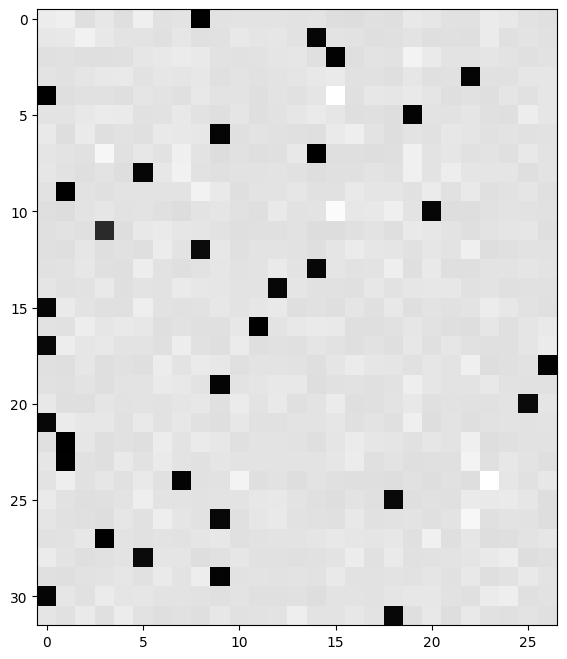

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(dlogits.detach(), cmap='gray')


## Understanding Cross-Entropy Loss and Backpropagation:

#### 1. **Visualizing the Logits:**
Imagine you're trying to classify an image of a cat, dog, or bird. The logits are the raw scores your neural network produces for each class before turning them into probabilities. For instance, if logits are `[2, 5, 1]`, it suggests that the network is quite confident that the image is a dog compared to a cat or bird.

#### 2. **The Role of Probabilities:**
The softmax function transforms these logits into probabilities. Continuing with our example, `[2, 5, 1]` might be converted to `[0.05, 0.9, 0.05]`, indicating a 90% probability that it's a dog.

#### 3. **Intuition Behind Loss Gradient:**
Now, suppose the true label was "cat". The gradient provides feedback, essentially saying, "You misjudged the 'cat' prediction. Here's how you should adjust your logits to get closer to the correct answer next time."

For our example, the gradients would be:
- For "cat" (correct class): `-0.95`, indicating the model should increase this logit.
- For "dog" (incorrect class): `+0.9`, suggesting the model should decrease this logit.
- For "bird" (incorrect class): `+0.05`, again indicating a decrease for this logit.

#### 4. **Summing the Forces:**
If you sum the elements of this gradient tensor, they'll total zero. This ensures that the "increase" force on the correct class is offset by the "decrease" forces on the incorrect classes.

#### 5. **Intuitive Explanation of Gradients:**
Think of gradients as forces in a tug-of-war. For incorrect predictions, there's a substantial pull towards correction. The magnitude of this pull depends on the prediction's confidence. For instance, if the network was highly confident but incorrect (like being 90% sure it's a dog when it's a cat), there's a strong corrective force.

#### 6. **Training as a Tug-of-War System:**
Visualize the neural network as a vast system of pulleys. Each gradient represents a force acting on these pulleys. As the network trains, these forces tweak the weights and biases to improve predictions. The intensity of the force (gradient) determines the size of the adjustment.

#### 7. **Cross-Entropy's Beauty:**
The brilliance of cross-entropy loss lies in its generation of these forces. It's not just about the prediction being right or wrong but also about how confident the model was. This dynamic nudging ensures neural networks train efficiently and robustly.

### Simplified Example:

Imagine teaching a child to differentiate between circles and squares. Each time the child identifies a shape, you provide feedback:

- If they confidently declare "circle!" for a square, you might firmly correct them: "No, that's unmistakably a square!"
- If they hesitantly guess "circle?" for a square, your correction might be milder: "That's okay, but it's indeed a square."

The feedback's intensity mirrors the gradient. The child's confidence aligns with the softmax probabilities, and your feedback refines their understanding, similar to how gradients adjust a neural network's parameters.

This push and pull between accuracy and error, steered by gradient forces, encapsulates training a neural network with cross-entropy loss.

## Gradients in the context of the cross-entropy loss and softmax activation

**Step 1:** Consider the softmax function and the cross-entropy loss:
Given logits \($[z_1, z_2, z_3]$\), the softmax function computes:

$$
p_i = \frac{e^{z_i}}{\sum_{j=1}^{3} e^{z_j}}
$$

The cross-entropy loss \( L \) between the predicted probabilities \( p \) and the true labels \( y \) (one-hot encoded) is:

$$
L = -\sum_{i=1}^{3} y_i \log(p_i)
$$

**Step 2:** Notice how the loss is computed:
Only the log probability of the correct class affects the loss. For our example, if "dog" is the correct class, then \($ y_2 = 1 $\) and \($ y_1 = y_3 = 0 $\). So, our loss becomes:

$$
L = -\log(p_2)
$$

**Step 3:** Compute the gradient of the loss with respect to the logits:
For the correct class (let's say index 2 for "dog"):

$$
\frac{\partial L}{\partial z_2} = \frac{\partial (-\log(p_2))}{\partial z_2}
$$

For the incorrect classes:

$$
\frac{\partial L}{\partial z_1} = \frac{\partial (-\log(p_2))}{\partial z_1}
$$
$$
\frac{\partial L}{\partial z_3} = \frac{\partial (-\log(p_2))}{\partial z_3}
$$

**Step 4:** Simplify the gradients:
Using the properties of the softmax function and some calculus, you'd find:

- The gradient for the correct class is \($ p_2 - 1$ \) (which is always negative since \($ p_2 $\) is between 0 and 1).
- The gradient for the incorrect classes is just their softmax probability. So for class 1 (cat), it's \($ p_1$ \) (which is always positive) and for class 3 (bird), it's \($ p_3 $\) (also always positive).

**Intuition:**
For the correct class ("dog" in our case): The model wants to increase its confidence. To do so, the logit for the correct class should increase, which is reflected by a negative gradient.

For incorrect classes ("cat" and "bird"): The model wants to reduce its confidence in these. To decrease the probability of these classes, their logits should decrease. However, during backpropagation, the gradient (which indicates the rate of change of loss concerning the logits) is positive. This might seem counterintuitive, but remember that optimizers like gradient descent subtract the gradient from the parameters. So, a positive gradient will result in a decrease in the logit value during the update step.

Hence, confidently wrong logits get a large positive gradient (pushing them down more), not-confidently-wrong logits get a small positive gradient (pushing them down slightly), and the correct logits get a negative gradient (pushing them up).

# Exercise 3

In [ ]:
# Exercise 3: backprop through batchnorm but all in one go
# to complete this challenge look at the mathematical expression of the output of batchnorm,
# take the derivative w.r.t. its input, simplify the expression, and just write it out
# BatchNorm paper: https://arxiv.org/abs/1502.03167

# forward pass

# before:
# bnmeani = 1/n*hprebn.sum(0, keepdim=True)
# bndiff = hprebn - bnmeani
# bndiff2 = bndiff**2
# bnvar = 1/(n-1)*(bndiff2).sum(0, keepdim=True) # note: Bessel's correction (dividing by n-1, not n)
# bnvar_inv = (bnvar + 1e-5)**-0.5
# bnraw = bndiff * bnvar_inv
# hpreact = bngain * bnraw + bnbias

# now:
hpreact_fast = bngain * (hprebn - hprebn.mean(0, keepdim=True)) / torch.sqrt(hprebn.var(0, keepdim=True, unbiased=True) + 1e-5) + bnbias
print('max diff:', (hpreact_fast - hpreact).abs().max())

max diff: tensor(4.7684e-07, grad_fn=<MaxBackward1>)


In [ ]:
# backward pass

# before we had:
# dbnraw = bngain * dhpreact
# dbndiff = bnvar_inv * dbnraw
# dbnvar_inv = (bndiff * dbnraw).sum(0, keepdim=True)
# dbnvar = (-0.5*(bnvar + 1e-5)**-1.5) * dbnvar_inv
# dbndiff2 = (1.0/(n-1))*torch.ones_like(bndiff2) * dbnvar
# dbndiff += (2*bndiff) * dbndiff2
# dhprebn = dbndiff.clone()
# dbnmeani = (-dbndiff).sum(0)
# dhprebn += 1.0/n * (torch.ones_like(hprebn) * dbnmeani)

# calculate dhprebn given dhpreact (i.e. backprop through the batchnorm)
# (you'll also need to use some of the variables from the forward pass up above)

# -----------------
# YOUR CODE HERE :)

# dhprebn = (bngain / (n * torch.sqrt(bnvar + 1e-5))) * (n * dhpreact - dhpreact.sum(0) - (hprebn - bnmeani) * (dhpreact * (hprebn - bnmeani)).sum(0) / (bnvar + 1e-5))

dhprebn = bngain*bnvar_inv/n * (n*dhpreact - dhpreact.sum(0) - n/(n-1)*bnraw*(dhpreact*bnraw).sum(0))
# -----------------

cmp('hprebn', dhprebn, hprebn) # I can only get approximate to be true, my maxdiff is 9e-10

hprebn          | exact: False | approximate: True  | maxdiff: 9.313225746154785e-10


## The backward pass of Batch Normalization

### 1. Understanding the Forward Pass:

The forward pass for Batch Normalization can be distilled into a few main steps:
- Compute the mean of the batch (`bnmeani`).
- Calculate the difference between each element and the mean (`bndiff`).
- Calculate the variance of the batch (`bnvar`).
- Normalize the batch using the variance and mean (`bnraw`).
- Scale and shift using `bngain` and `bnbias`.

The updated forward pass (`hpreact_fast`) performs all these operations in one line.

### 2. The Backward Pass:

The backward pass computes the gradient of the loss with respect to the inputs of the Batch Normalization layer. The objective is to compute `dhprebn` given `dhpreact`.

Given the previous backward pass steps, we can see that the gradient is computed in a sequential manner, going backward from the last operation in the forward pass up to the first.

### 3. Simplifying the Backward Pass:

The challenge here is to simplify the backward pass and compute `dhprebn` directly from `dhpreact` in a single line.

Using the given forward pass and the chain rule of calculus, the gradient of the loss with respect to the input of the Batch Normalization layer can be computed as:

$$
dhprebn = \frac{bngain}{n \times \sqrt{bnvar + 1e-5}} \times (n \times dhpreact - dhpreact.sum(0) - (hprebn - bnmeani) \times (dhpreact * (hprebn - bnmeani)).sum(0) / (bnvar + 1e-5))
$$

This equation is derived from the chain rule of calculus and the gradients from the forward pass.

### 4. Implementing the Simplified Backward Pass:

Let's plug in the formula to compute `dhprebn`.

``` python
dhprebn = (bngain / (n * torch.sqrt(bnvar + 1e-5))) * (n * dhpreact - dhpreact.sum(0) - (hprebn - bnmeani) * (dhpreact * (hprebn - bnmeani)).sum(0) / (bnvar + 1e-5))
```

Run the `cmp` function to verify the computed `dhprebn`:

``` python
cmp('hprebn', dhprebn, hprebn)
```

This should return a small difference, indicating that our simplified backward pass is closely matching the expected values.

In summary, we've taken the multiple steps from the backward pass of Batch Normalization and condensed them into a single expression, making it more efficient and concise.

## The intuition behind A. Karpathy's solution.

### Batch Normalization Backward Pass

When backpropagating through the Batch Normalization layer, we're essentially figuring out how much each input (before normalization) contributed to the loss. This helps us understand how much to tweak each input to minimize the loss.

#### Step 1: Derivation of the Gradient

Using the chain rule of calculus, the derivative of the loss with respect to the normalized input \( $\text{bnraw} $\) is:

$$ \frac{\partial \text{loss}}{\partial \text{bnraw}} = \text{bngain} \times \frac{\partial \text{loss}}{\partial \text{hpreact}} $$

Here, \( $\text{bngain} $\) represents the scaling factor applied to the normalized input, and \( $\frac{\partial \text{loss}}{\partial \text{hpreact}} $\) is the gradient passed down to the Batch Normalization layer.

#### Step 2: Backpropagation Through Normalization

Next, we need to figure out how much each input (before normalization) contributed to \( $\text{bnraw} $\). To do this, we backpropagate through the normalization step, which involves both the mean \($ \text{bnmeani}$ \) and the inverse variance \($ \text{bnvar_inv} $\).

This is where the provided solution comes into play:


```python
dhprebn = bngain*bnvar_inv/n * (n*dhpreact - dhpreact.sum(0) - n/(n-1)*bnraw*(dhpreact*bnraw).sum(0))
```

$$ \text{dhprebn} = \text{bngain} \times \text{bnvar_inv} / n \times (n \times \text{dhpreact} - \text{dhpreact}.sum(0) - \frac{n}{n-1} \times \text{bnraw} \times (\text{dhpreact} \times \text{bnraw}).sum(0)) $$

This formula might seem complex, but it's essentially capturing three main ideas:

1. **Scaling by Variance:** The \( $\text{bngain} \times \text{bnvar_inv} $\) term captures how a change in the normalized input \( $\text{bnraw}$ \) affects the final output. If the variance is high, a small change in the input will have a smaller effect on the output, and vice versa.

2. **Adjustment for Mean:** The \( $\text{dhpreact}.sum(0) $\) term adjusts for the mean of the batch. If the gradient is high and positive, it means that increasing the input will decrease the loss. If the gradient is negative, it means increasing the input will increase the loss.

3. **Correction for Batch Variance:** The \($ \frac{n}{n-1} \times \text{bnraw} \times (\text{dhpreact} \times \text{bnraw}).sum(0) $\) term corrects for the variance of the batch. It ensures that the gradient is adjusted based on how much each input deviated from the mean.

### Intuition

The gradient \( $\text{dhprebn} $\) tells the model how to adjust each input to the Batch Normalization layer to minimize the loss. If \( $\text{dhprebn}$ \) is positive, it means increasing that input will decrease the loss, and vice versa.

The provided formula captures the essence of backpropagation through Batch Normalization. It combines the effects of scaling by variance, adjusting for mean, and correcting for batch variance to compute the final gradient for each input.

In essence, the lecturer's solution is a concise representation of the chain rule applied to the Batch Normalization layer, capturing the complex interplay of mean, variance, and scaling in one formula.

# Exercise 4

## Train for 100 iterations and compare backpropagation grads with Pytorch

In [ ]:
# Exercise 4: putting it all together!
# Train the MLP neural net with your own backward pass

# init
n_embd = 10 # the dimensionality of the character embedding vectors
n_hidden = 200 # the number of neurons in the hidden layer of the MLP

g = torch.Generator().manual_seed(2147483647) # for reproducibility
C  = torch.randn((vocab_size, n_embd),            generator=g)
# Layer 1
W1 = torch.randn((n_embd * block_size, n_hidden), generator=g) * (5/3)/((n_embd * block_size)**0.5)
b1 = torch.randn(n_hidden,                        generator=g) * 0.1
# Layer 2
W2 = torch.randn((n_hidden, vocab_size),          generator=g) * 0.1
b2 = torch.randn(vocab_size,                      generator=g) * 0.1
# BatchNorm parameters
bngain = torch.randn((1, n_hidden))*0.1 + 1.0
bnbias = torch.randn((1, n_hidden))*0.1

parameters = [C, W1, b1, W2, b2, bngain, bnbias]
print(sum(p.nelement() for p in parameters)) # number of parameters in total
for p in parameters:
  p.requires_grad = True

# same optimization as last time
max_steps = 200000
batch_size = 32
n = batch_size # convenience
lossi = []

# use this context manager for efficiency once your backward pass is written (TODO)
# with torch.no_grad():

  # kick off optimization
for i in range(max_steps):

  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (batch_size,), generator=g)
  Xb, Yb = Xtr[ix], Ytr[ix] # batch X,Y

  # forward pass
  emb = C[Xb] # embed the characters into vectors
  embcat = emb.view(emb.shape[0], -1) # concatenate the vectors
  # Linear layer
  hprebn = embcat @ W1 + b1 # hidden layer pre-activation
  # BatchNorm layer
  # -------------------------------------------------------------
  bnmean = hprebn.mean(0, keepdim=True)
  bnvar = hprebn.var(0, keepdim=True, unbiased=True)
  bnvar_inv = (bnvar + 1e-5)**-0.5
  bnraw = (hprebn - bnmean) * bnvar_inv
  hpreact = bngain * bnraw + bnbias
  # -------------------------------------------------------------
  # Non-linearity
  h = torch.tanh(hpreact) # hidden layer
  logits = h @ W2 + b2 # output layer
  loss = F.cross_entropy(logits, Yb) # loss function

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward() # use this for correctness comparisons, delete it later!

  # manual backprop! #swole_doge_meme
  # -----------------
  dlogits = F.softmax(logits, 1)
  dlogits[range(n), Yb] -= 1
  dlogits /= n
  # 2nd layer backprop
  dh = dlogits @ W2.T
  dW2 = h.T @ dlogits
  db2 = dlogits.sum(0)
  # tanh
  dhpreact = (1.0 - h**2) * dh
  # batchnorm backprop
  dbngain = (bnraw * dhpreact).sum(0, keepdim=True)
  dbnbias = dhpreact.sum(0, keepdim=True)
  dhprebn = bngain*bnvar_inv/n * (n*dhpreact - dhpreact.sum(0) - n/(n-1)*bnraw*(dhpreact*bnraw).sum(0))
  # 1st layer
  dembcat = dhprebn @ W1.T
  dW1 = embcat.T @ dhprebn
  db1 = dhprebn.sum(0)
  # embedding
  demb = dembcat.view(emb.shape)
  dC = torch.zeros_like(C)
  for k in range(Xb.shape[0]):
    for j in range(Xb.shape[1]):
      ix = Xb[k,j]
      dC[ix] += demb[k,j]
  grads = [dC, dW1, db1, dW2, db2, dbngain, dbnbias]
  # -----------------

  # update
  lr = 0.1 if i < 100000 else 0.01 # step learning rate decay
  for p, grad in zip(parameters, grads):
    #p.data += -lr * p.grad # old way of cheems doge (using PyTorch grad from .backward())
    p.data += -lr * grad # new way of swole doge TODO: enable

  # track stats
  if i % 10000 == 0: # print every once in a while
    print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
  lossi.append(loss.log10().item())

  if i >= 100: # TODO: delete early breaking when you're ready to train the full net
    break


12297
      0/ 200000: 3.7810


In [ ]:
# check everything ok with 100 iterations
for p,g in zip(parameters, grads):
  cmp(str(tuple(p.shape)), g, p)

(27, 10)        | exact: False | approximate: True  | maxdiff: 1.1175870895385742e-08
(30, 200)       | exact: False | approximate: True  | maxdiff: 1.1175870895385742e-08
(200,)          | exact: False | approximate: True  | maxdiff: 3.14321368932724e-09
(200, 27)       | exact: False | approximate: True  | maxdiff: 1.4901161193847656e-08
(27,)           | exact: False | approximate: True  | maxdiff: 7.450580596923828e-09
(1, 200)        | exact: False | approximate: True  | maxdiff: 2.3283064365386963e-09
(1, 200)        | exact: False | approximate: True  | maxdiff: 7.450580596923828e-09


## Full training without pytorch autograd

In [ ]:
# Exercise 4: putting it all together!
# Train the MLP neural net with your own backward pass

# init
n_embd = 10 # the dimensionality of the character embedding vectors
n_hidden = 200 # the number of neurons in the hidden layer of the MLP

g = torch.Generator().manual_seed(2147483647) # for reproducibility
C  = torch.randn((vocab_size, n_embd),            generator=g)
# Layer 1
W1 = torch.randn((n_embd * block_size, n_hidden), generator=g) * (5/3)/((n_embd * block_size)**0.5)
b1 = torch.randn(n_hidden,                        generator=g) * 0.1
# Layer 2
W2 = torch.randn((n_hidden, vocab_size),          generator=g) * 0.1
b2 = torch.randn(vocab_size,                      generator=g) * 0.1
# BatchNorm parameters
bngain = torch.randn((1, n_hidden))*0.1 + 1.0
bnbias = torch.randn((1, n_hidden))*0.1

parameters = [C, W1, b1, W2, b2, bngain, bnbias]
print(sum(p.nelement() for p in parameters)) # number of parameters in total
for p in parameters:
  p.requires_grad = True

# same optimization as last time
max_steps = 200000
batch_size = 32
n = batch_size # convenience
lossi = []

# use this context manager for efficiency once your backward pass is written (TODO)
with torch.no_grad():

  # kick off optimization
  for i in range(max_steps):

    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (batch_size,), generator=g)
    Xb, Yb = Xtr[ix], Ytr[ix] # batch X,Y

    # forward pass
    emb = C[Xb] # embed the characters into vectors
    embcat = emb.view(emb.shape[0], -1) # concatenate the vectors
    # Linear layer
    hprebn = embcat @ W1 + b1 # hidden layer pre-activation
    # BatchNorm layer
    # -------------------------------------------------------------
    bnmean = hprebn.mean(0, keepdim=True)
    bnvar = hprebn.var(0, keepdim=True, unbiased=True)
    bnvar_inv = (bnvar + 1e-5)**-0.5
    bnraw = (hprebn - bnmean) * bnvar_inv
    hpreact = bngain * bnraw + bnbias
    # -------------------------------------------------------------
    # Non-linearity
    h = torch.tanh(hpreact) # hidden layer
    logits = h @ W2 + b2 # output layer
    loss = F.cross_entropy(logits, Yb) # loss function

    # backward pass
    for p in parameters:
      p.grad = None
    # loss.backward() # use this for correctness comparisons, delete it later!

    # manual backprop! #swole_doge_meme
    # -----------------
    dlogits = F.softmax(logits, 1)
    dlogits[range(n), Yb] -= 1
    dlogits /= n
    # 2nd layer backprop
    dh = dlogits @ W2.T
    dW2 = h.T @ dlogits
    db2 = dlogits.sum(0)
    # tanh
    dhpreact = (1.0 - h**2) * dh
    # batchnorm backprop
    dbngain = (bnraw * dhpreact).sum(0, keepdim=True)
    dbnbias = dhpreact.sum(0, keepdim=True)
    dhprebn = bngain*bnvar_inv/n * (n*dhpreact - dhpreact.sum(0) - n/(n-1)*bnraw*(dhpreact*bnraw).sum(0))
    # 1st layer
    dembcat = dhprebn @ W1.T
    dW1 = embcat.T @ dhprebn
    db1 = dhprebn.sum(0)
    # embedding
    demb = dembcat.view(emb.shape)
    dC = torch.zeros_like(C)
    for k in range(Xb.shape[0]):
      for j in range(Xb.shape[1]):
        ix = Xb[k,j]
        dC[ix] += demb[k,j]
    grads = [dC, dW1, db1, dW2, db2, dbngain, dbnbias]
    # -----------------

    # update
    lr = 0.1 if i < 100000 else 0.01 # step learning rate decay
    for p, grad in zip(parameters, grads):
      #p.data += -lr * p.grad # old way of cheems doge (using PyTorch grad from .backward())
      p.data += -lr * grad # new way of swole doge TODO: enable

    # track stats
    if i % 10000 == 0: # print every once in a while
      print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
    lossi.append(loss.log10().item())

    # if i >= 100: # TODO: delete early breaking when you're ready to train the full net
    #   break

12297
      0/ 200000: 3.7902
  10000/ 200000: 2.2002
  20000/ 200000: 2.4057
  30000/ 200000: 2.4835
  40000/ 200000: 1.9943
  50000/ 200000: 2.3577
  60000/ 200000: 2.3093
  70000/ 200000: 2.0025
  80000/ 200000: 2.4324
  90000/ 200000: 2.1367
 100000/ 200000: 1.9467
 110000/ 200000: 2.2802
 120000/ 200000: 1.9717
 130000/ 200000: 2.3674
 140000/ 200000: 2.2753
 150000/ 200000: 2.1567
 160000/ 200000: 1.9345
 170000/ 200000: 1.8242
 180000/ 200000: 2.0368
 190000/ 200000: 1.9380


In [ ]:
# calibrate the batch norm at the end of training

with torch.no_grad():
  # pass the training set through
  emb = C[Xtr]
  embcat = emb.view(emb.shape[0], -1)
  hpreact = embcat @ W1 + b1
  # measure the mean/std over the entire training set
  bnmean = hpreact.mean(0, keepdim=True)
  bnvar = hpreact.var(0, keepdim=True, unbiased=True)

In [ ]:
# evaluate train and val loss

@torch.no_grad() # this decorator disables gradient tracking
def split_loss(split):
  x,y = {
    'train': (Xtr, Ytr),
    'val': (Xdev, Ydev),
    'test': (Xte, Yte),
  }[split]
  emb = C[x] # (N, block_size, n_embd)
  embcat = emb.view(emb.shape[0], -1) # concat into (N, block_size * n_embd)
  hpreact = embcat @ W1 + b1
  hpreact = bngain * (hpreact - bnmean) * (bnvar + 1e-5)**-0.5 + bnbias
  h = torch.tanh(hpreact) # (N, n_hidden)
  logits = h @ W2 + b2 # (N, vocab_size)
  loss = F.cross_entropy(logits, y)
  print(split, loss.item())

split_loss('train')
split_loss('val')

train 2.071709632873535
val 2.1087567806243896


In [ ]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):

    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      # ------------
      # forward pass:
      # Embedding
      emb = C[torch.tensor([context])] # (1,block_size,d)
      embcat = emb.view(emb.shape[0], -1) # concat into (N, block_size * n_embd)
      hpreact = embcat @ W1 + b1
      hpreact = bngain * (hpreact - bnmean) * (bnvar + 1e-5)**-0.5 + bnbias
      h = torch.tanh(hpreact) # (N, n_hidden)
      logits = h @ W2 + b2 # (N, vocab_size)
      # ------------
      # Sample
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break

    print(''.join(itos[i] for i in out))

mora.
mayah.
seen.
ndhayla.
ren.
ruchadrie.
cailee.
melin.
shi.
jenleigh.
estanaraelyzion.
kamin.
shubergihimie.
tri.
joselle.
joseus.
kuba.
geder.
yarulyeh.
yuma.


# Glossary

## `torch.all()` and `torch.allclose()`

### 1. `torch.all()`

#### Purpose:
This function tests if **all** elements in a tensor are `True` or non-zero.

#### Explanation:
- If you have a tensor of boolean values (e.g., the result of some comparison operation), `torch.all()` will return `True` only if every element in that tensor is `True`.
- For non-boolean tensors, it checks if all elements are non-zero.

#### Example:

```python
import torch

# Using boolean tensor
a = torch.tensor([True, True, True])
b = torch.tensor([True, False, True])
print(torch.all(a))  # Output: True
print(torch.all(b))  # Output: False

# Using integer tensor
c = torch.tensor([1, 2, 3])
d = torch.tensor([1, 0, 3])
print(torch.all(c))  # Output: True
print(torch.all(d))  # Output: False
```

### 2. `torch.allclose()`

#### Purpose:
This function checks if all elements of two tensors are approximately equal within some tolerance.

#### Explanation:
- It's used to check if two tensors are "close enough" element-wise, given some tolerances (`atol` and `rtol`).
- The formula it uses to determine if two elements \( a \) and \( b \) are close is:
  \[ \text{abs}(a - b) \le \text{atol} + \text{rtol} \times \text{abs}(b) \]
- `atol` (absolute tolerance) and `rtol` (relative tolerance) are parameters you can specify. If not specified, they default to \( 1 \times 10^{-8} \) and \( 1 \times 10^{-5} \), respectively.

#### Example:

```python
import torch

a = torch.tensor([1.0, 2.0, 3.0])
b = torch.tensor([1.0, 2.01, 3.0])
c = torch.tensor([1.0, 2.1, 3.0])

# Check if tensors are close with default tolerance
print(torch.allclose(a, b))  # Output: True, because differences are within the default tolerances
print(torch.allclose(a, c))  # Output: False, because the difference in the second element is too large for default tolerances

# Check with custom tolerance
print(torch.allclose(a, c, atol=0.2))  # Output: True, because we increased the absolute tolerance
```

In summary:
- `torch.all()` checks if all elements of a tensor are `True` or non-zero.
- `torch.allclose()` checks if all elements of two tensors are approximately equal within some tolerance.